In [1]:
# Behar diren liburutegi guztiak hartu
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import collections
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import nltk
import nltk as nlp
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jonander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jonander/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jonander/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Datuak hemendik hartu dira: https://www.kaggle.com/kapastor/democratvsrepublicantweets/version/4

In [27]:
# Instantziak kargatu
tweets = pd.read_csv('ExtractedTweets.csv') #Party (clase), Handle, Tweet
print(str(len(tweets)) + " tweets han sido cargados")
repTweet = tweets[tweets.Party!="Democrat"]
demTweet = tweets[tweets.Party!="Democrat"]
tweets['numClass'] = tweets['Party'].map({'Democrat':0, 'Republican':1}) 
porcentajeDem = (len(demTweet) / len(tweets)) * 100
print("Hay " + str(len(repTweet)) + " instancias con la clase Republican, el porcenjate es de " + str(porcentajeDem) + " %")
print("Hay " + str(len(demTweet)) + " instancias con la clase Democrat, el porcenjate es de " + str(100 - porcentajeDem) + " %")

86460 tweets han sido cargados
Instancia:0
Instancia:1
Instancia:2
Instancia:3
Instancia:4
Instancia:5
Instancia:6
Instancia:7
Instancia:8
Instancia:9
Instancia:10
Instancia:11
Instancia:12
Instancia:13
Instancia:14
Instancia:15
Instancia:16
Instancia:17
Instancia:18
Instancia:19
Instancia:20
Instancia:21
Instancia:22
Instancia:23
Instancia:24
Instancia:25
Instancia:26
Instancia:27
Instancia:28
Instancia:29
Instancia:30
Instancia:31
Instancia:32
Instancia:33
Instancia:34
Instancia:35
Instancia:36
Instancia:37
Instancia:38
Instancia:39
Instancia:40
Instancia:41
Instancia:42
Instancia:43
Instancia:44
Instancia:45
Instancia:46
Instancia:47
Instancia:48
Instancia:49
Instancia:50
Instancia:51
Instancia:52
Instancia:53
Instancia:54
Instancia:55
Instancia:56
Instancia:57
Instancia:58
Instancia:59
Instancia:60
Instancia:61
Instancia:62
Instancia:63
Instancia:64
Instancia:65
Instancia:66
Instancia:67
Instancia:68
Instancia:69
Instancia:70
Instancia:71
Instancia:72
Instancia:73
Instancia:74
Inst

Instancia:748
Instancia:749
Instancia:750
Instancia:751
Instancia:752
Instancia:753
Instancia:754
Instancia:755
Instancia:756
Instancia:757
Instancia:758
Instancia:759
Instancia:760
Instancia:761
Instancia:762
Instancia:763
Instancia:764
Instancia:765
Instancia:766
Instancia:767
Instancia:768
Instancia:769
Instancia:770
Instancia:771
Instancia:772
Instancia:773
Instancia:774
Instancia:775
Instancia:776
Instancia:777
Instancia:778
Instancia:779
Instancia:780
Instancia:781
Instancia:782
Instancia:783
Instancia:784
Instancia:785
Instancia:786
Instancia:787
Instancia:788
Instancia:789
Instancia:790
Instancia:791
Instancia:792
Instancia:793
Instancia:794
Instancia:795
Instancia:796
Instancia:797
Instancia:798
Instancia:799
Instancia:800
Instancia:801
Instancia:802
Instancia:803
Instancia:804
Instancia:805
Instancia:806
Instancia:807
Instancia:808
Instancia:809
Instancia:810
Instancia:811
Instancia:812
Instancia:813
Instancia:814
Instancia:815
Instancia:816
Instancia:817
Instancia:818
Instan

Instancia:1312
Instancia:1313
Instancia:1314
Instancia:1315
Instancia:1316
Instancia:1317
Instancia:1318
Instancia:1319
Instancia:1320
Instancia:1321
Instancia:1322
Instancia:1323
Instancia:1324
Instancia:1325
Instancia:1326
Instancia:1327
Instancia:1328
Instancia:1329
Instancia:1330
Instancia:1331
Instancia:1332
Instancia:1333
Instancia:1334
Instancia:1335
Instancia:1336
Instancia:1337
Instancia:1338
Instancia:1339
Instancia:1340
Instancia:1341
Instancia:1342
Instancia:1343
Instancia:1344
Instancia:1345
Instancia:1346
Instancia:1347
Instancia:1348
Instancia:1349
Instancia:1350
Instancia:1351
Instancia:1352
Instancia:1353
Instancia:1354
Instancia:1355
Instancia:1356
Instancia:1357
Instancia:1358
Instancia:1359
Instancia:1360
Instancia:1361
Instancia:1362
Instancia:1363
Instancia:1364
Instancia:1365
Instancia:1366
Instancia:1367
Instancia:1368
Instancia:1369
Instancia:1370
Instancia:1371
Instancia:1372
Instancia:1373
Instancia:1374
Instancia:1375
Instancia:1376
Instancia:1377
Instancia:

Instancia:2146
Instancia:2147
Instancia:2148
Instancia:2149
Instancia:2150
Instancia:2151
Instancia:2152
Instancia:2153
Instancia:2154
Instancia:2155
Instancia:2156
Instancia:2157
Instancia:2158
Instancia:2159
Instancia:2160
Instancia:2161
Instancia:2162
Instancia:2163
Instancia:2164
Instancia:2165
Instancia:2166
Instancia:2167
Instancia:2168
Instancia:2169
Instancia:2170
Instancia:2171
Instancia:2172
Instancia:2173
Instancia:2174
Instancia:2175
Instancia:2176
Instancia:2177
Instancia:2178
Instancia:2179
Instancia:2180
Instancia:2181
Instancia:2182
Instancia:2183
Instancia:2184
Instancia:2185
Instancia:2186
Instancia:2187
Instancia:2188
Instancia:2189
Instancia:2190
Instancia:2191
Instancia:2192
Instancia:2193
Instancia:2194
Instancia:2195
Instancia:2196
Instancia:2197
Instancia:2198
Instancia:2199
Instancia:2200
Instancia:2201
Instancia:2202
Instancia:2203
Instancia:2204
Instancia:2205
Instancia:2206
Instancia:2207
Instancia:2208
Instancia:2209
Instancia:2210
Instancia:2211
Instancia:

Instancia:2834
Instancia:2835
Instancia:2836
Instancia:2837
Instancia:2838
Instancia:2839
Instancia:2840
Instancia:2841
Instancia:2842
Instancia:2843
Instancia:2844
Instancia:2845
Instancia:2846
Instancia:2847
Instancia:2848
Instancia:2849
Instancia:2850
Instancia:2851
Instancia:2852
Instancia:2853
Instancia:2854
Instancia:2855
Instancia:2856
Instancia:2857
Instancia:2858
Instancia:2859
Instancia:2860
Instancia:2861
Instancia:2862
Instancia:2863
Instancia:2864
Instancia:2865
Instancia:2866
Instancia:2867
Instancia:2868
Instancia:2869
Instancia:2870
Instancia:2871
Instancia:2872
Instancia:2873
Instancia:2874
Instancia:2875
Instancia:2876
Instancia:2877
Instancia:2878
Instancia:2879
Instancia:2880
Instancia:2881
Instancia:2882
Instancia:2883
Instancia:2884
Instancia:2885
Instancia:2886
Instancia:2887
Instancia:2888
Instancia:2889
Instancia:2890
Instancia:2891
Instancia:2892
Instancia:2893
Instancia:2894
Instancia:2895
Instancia:2896
Instancia:2897
Instancia:2898
Instancia:2899
Instancia:

Instancia:3409
Instancia:3410
Instancia:3411
Instancia:3412
Instancia:3413
Instancia:3414
Instancia:3415
Instancia:3416
Instancia:3417
Instancia:3418
Instancia:3419
Instancia:3420
Instancia:3421
Instancia:3422
Instancia:3423
Instancia:3424
Instancia:3425
Instancia:3426
Instancia:3427
Instancia:3428
Instancia:3429
Instancia:3430
Instancia:3431
Instancia:3432
Instancia:3433
Instancia:3434
Instancia:3435
Instancia:3436
Instancia:3437
Instancia:3438
Instancia:3439
Instancia:3440
Instancia:3441
Instancia:3442
Instancia:3443
Instancia:3444
Instancia:3445
Instancia:3446
Instancia:3447
Instancia:3448
Instancia:3449
Instancia:3450
Instancia:3451
Instancia:3452
Instancia:3453
Instancia:3454
Instancia:3455
Instancia:3456
Instancia:3457
Instancia:3458
Instancia:3459
Instancia:3460
Instancia:3461
Instancia:3462
Instancia:3463
Instancia:3464
Instancia:3465
Instancia:3466
Instancia:3467
Instancia:3468
Instancia:3469
Instancia:3470
Instancia:3471
Instancia:3472
Instancia:3473
Instancia:3474
Instancia:

Instancia:4071
Instancia:4072
Instancia:4073
Instancia:4074
Instancia:4075
Instancia:4076
Instancia:4077
Instancia:4078
Instancia:4079
Instancia:4080
Instancia:4081
Instancia:4082
Instancia:4083
Instancia:4084
Instancia:4085
Instancia:4086
Instancia:4087
Instancia:4088
Instancia:4089
Instancia:4090
Instancia:4091
Instancia:4092
Instancia:4093
Instancia:4094
Instancia:4095
Instancia:4096
Instancia:4097
Instancia:4098
Instancia:4099
Instancia:4100
Instancia:4101
Instancia:4102
Instancia:4103
Instancia:4104
Instancia:4105
Instancia:4106
Instancia:4107
Instancia:4108
Instancia:4109
Instancia:4110
Instancia:4111
Instancia:4112
Instancia:4113
Instancia:4114
Instancia:4115
Instancia:4116
Instancia:4117
Instancia:4118
Instancia:4119
Instancia:4120
Instancia:4121
Instancia:4122
Instancia:4123
Instancia:4124
Instancia:4125
Instancia:4126
Instancia:4127
Instancia:4128
Instancia:4129
Instancia:4130
Instancia:4131
Instancia:4132
Instancia:4133
Instancia:4134
Instancia:4135
Instancia:4136
Instancia:

Instancia:4744
Instancia:4745
Instancia:4746
Instancia:4747
Instancia:4748
Instancia:4749
Instancia:4750
Instancia:4751
Instancia:4752
Instancia:4753
Instancia:4754
Instancia:4755
Instancia:4756
Instancia:4757
Instancia:4758
Instancia:4759
Instancia:4760
Instancia:4761
Instancia:4762
Instancia:4763
Instancia:4764
Instancia:4765
Instancia:4766
Instancia:4767
Instancia:4768
Instancia:4769
Instancia:4770
Instancia:4771
Instancia:4772
Instancia:4773
Instancia:4774
Instancia:4775
Instancia:4776
Instancia:4777
Instancia:4778
Instancia:4779
Instancia:4780
Instancia:4781
Instancia:4782
Instancia:4783
Instancia:4784
Instancia:4785
Instancia:4786
Instancia:4787
Instancia:4788
Instancia:4789
Instancia:4790
Instancia:4791
Instancia:4792
Instancia:4793
Instancia:4794
Instancia:4795
Instancia:4796
Instancia:4797
Instancia:4798
Instancia:4799
Instancia:4800
Instancia:4801
Instancia:4802
Instancia:4803
Instancia:4804
Instancia:4805
Instancia:4806
Instancia:4807
Instancia:4808
Instancia:4809
Instancia:

Instancia:5483
Instancia:5484
Instancia:5485
Instancia:5486
Instancia:5487
Instancia:5488
Instancia:5489
Instancia:5490
Instancia:5491
Instancia:5492
Instancia:5493
Instancia:5494
Instancia:5495
Instancia:5496
Instancia:5497
Instancia:5498
Instancia:5499
Instancia:5500
Instancia:5501
Instancia:5502
Instancia:5503
Instancia:5504
Instancia:5505
Instancia:5506
Instancia:5507
Instancia:5508
Instancia:5509
Instancia:5510
Instancia:5511
Instancia:5512
Instancia:5513
Instancia:5514
Instancia:5515
Instancia:5516
Instancia:5517
Instancia:5518
Instancia:5519
Instancia:5520
Instancia:5521
Instancia:5522
Instancia:5523
Instancia:5524
Instancia:5525
Instancia:5526
Instancia:5527
Instancia:5528
Instancia:5529
Instancia:5530
Instancia:5531
Instancia:5532
Instancia:5533
Instancia:5534
Instancia:5535
Instancia:5536
Instancia:5537
Instancia:5538
Instancia:5539
Instancia:5540
Instancia:5541
Instancia:5542
Instancia:5543
Instancia:5544
Instancia:5545
Instancia:5546
Instancia:5547
Instancia:5548
Instancia:

Instancia:6065
Instancia:6066
Instancia:6067
Instancia:6068
Instancia:6069
Instancia:6070
Instancia:6071
Instancia:6072
Instancia:6073
Instancia:6074
Instancia:6075
Instancia:6076
Instancia:6077
Instancia:6078
Instancia:6079
Instancia:6080
Instancia:6081
Instancia:6082
Instancia:6083
Instancia:6084
Instancia:6085
Instancia:6086
Instancia:6087
Instancia:6088
Instancia:6089
Instancia:6090
Instancia:6091
Instancia:6092
Instancia:6093
Instancia:6094
Instancia:6095
Instancia:6096
Instancia:6097
Instancia:6098
Instancia:6099
Instancia:6100
Instancia:6101
Instancia:6102
Instancia:6103
Instancia:6104
Instancia:6105
Instancia:6106
Instancia:6107
Instancia:6108
Instancia:6109
Instancia:6110
Instancia:6111
Instancia:6112
Instancia:6113
Instancia:6114
Instancia:6115
Instancia:6116
Instancia:6117
Instancia:6118
Instancia:6119
Instancia:6120
Instancia:6121
Instancia:6122
Instancia:6123
Instancia:6124
Instancia:6125
Instancia:6126
Instancia:6127
Instancia:6128
Instancia:6129
Instancia:6130
Instancia:

Instancia:6698
Instancia:6699
Instancia:6700
Instancia:6701
Instancia:6702
Instancia:6703
Instancia:6704
Instancia:6705
Instancia:6706
Instancia:6707
Instancia:6708
Instancia:6709
Instancia:6710
Instancia:6711
Instancia:6712
Instancia:6713
Instancia:6714
Instancia:6715
Instancia:6716
Instancia:6717
Instancia:6718
Instancia:6719
Instancia:6720
Instancia:6721
Instancia:6722
Instancia:6723
Instancia:6724
Instancia:6725
Instancia:6726
Instancia:6727
Instancia:6728
Instancia:6729
Instancia:6730
Instancia:6731
Instancia:6732
Instancia:6733
Instancia:6734
Instancia:6735
Instancia:6736
Instancia:6737
Instancia:6738
Instancia:6739
Instancia:6740
Instancia:6741
Instancia:6742
Instancia:6743
Instancia:6744
Instancia:6745
Instancia:6746
Instancia:6747
Instancia:6748
Instancia:6749
Instancia:6750
Instancia:6751
Instancia:6752
Instancia:6753
Instancia:6754
Instancia:6755
Instancia:6756
Instancia:6757
Instancia:6758
Instancia:6759
Instancia:6760
Instancia:6761
Instancia:6762
Instancia:6763
Instancia:

Instancia:7277
Instancia:7278
Instancia:7279
Instancia:7280
Instancia:7281
Instancia:7282
Instancia:7283
Instancia:7284
Instancia:7285
Instancia:7286
Instancia:7287
Instancia:7288
Instancia:7289
Instancia:7290
Instancia:7291
Instancia:7292
Instancia:7293
Instancia:7294
Instancia:7295
Instancia:7296
Instancia:7297
Instancia:7298
Instancia:7299
Instancia:7300
Instancia:7301
Instancia:7302
Instancia:7303
Instancia:7304
Instancia:7305
Instancia:7306
Instancia:7307
Instancia:7308
Instancia:7309
Instancia:7310
Instancia:7311
Instancia:7312
Instancia:7313
Instancia:7314
Instancia:7315
Instancia:7316
Instancia:7317
Instancia:7318
Instancia:7319
Instancia:7320
Instancia:7321
Instancia:7322
Instancia:7323
Instancia:7324
Instancia:7325
Instancia:7326
Instancia:7327
Instancia:7328
Instancia:7329
Instancia:7330
Instancia:7331
Instancia:7332
Instancia:7333
Instancia:7334
Instancia:7335
Instancia:7336
Instancia:7337
Instancia:7338
Instancia:7339
Instancia:7340
Instancia:7341
Instancia:7342
Instancia:

Instancia:7836
Instancia:7837
Instancia:7838
Instancia:7839
Instancia:7840
Instancia:7841
Instancia:7842
Instancia:7843
Instancia:7844
Instancia:7845
Instancia:7846
Instancia:7847
Instancia:7848
Instancia:7849
Instancia:7850
Instancia:7851
Instancia:7852
Instancia:7853
Instancia:7854
Instancia:7855
Instancia:7856
Instancia:7857
Instancia:7858
Instancia:7859
Instancia:7860
Instancia:7861
Instancia:7862
Instancia:7863
Instancia:7864
Instancia:7865
Instancia:7866
Instancia:7867
Instancia:7868
Instancia:7869
Instancia:7870
Instancia:7871
Instancia:7872
Instancia:7873
Instancia:7874
Instancia:7875
Instancia:7876
Instancia:7877
Instancia:7878
Instancia:7879
Instancia:7880
Instancia:7881
Instancia:7882
Instancia:7883
Instancia:7884
Instancia:7885
Instancia:7886
Instancia:7887
Instancia:7888
Instancia:7889
Instancia:7890
Instancia:7891
Instancia:7892
Instancia:7893
Instancia:7894
Instancia:7895
Instancia:7896
Instancia:7897
Instancia:7898
Instancia:7899
Instancia:7900
Instancia:7901
Instancia:

Instancia:8452
Instancia:8453
Instancia:8454
Instancia:8455
Instancia:8456
Instancia:8457
Instancia:8458
Instancia:8459
Instancia:8460
Instancia:8461
Instancia:8462
Instancia:8463
Instancia:8464
Instancia:8465
Instancia:8466
Instancia:8467
Instancia:8468
Instancia:8469
Instancia:8470
Instancia:8471
Instancia:8472
Instancia:8473
Instancia:8474
Instancia:8475
Instancia:8476
Instancia:8477
Instancia:8478
Instancia:8479
Instancia:8480
Instancia:8481
Instancia:8482
Instancia:8483
Instancia:8484
Instancia:8485
Instancia:8486
Instancia:8487
Instancia:8488
Instancia:8489
Instancia:8490
Instancia:8491
Instancia:8492
Instancia:8493
Instancia:8494
Instancia:8495
Instancia:8496
Instancia:8497
Instancia:8498
Instancia:8499
Instancia:8500
Instancia:8501
Instancia:8502
Instancia:8503
Instancia:8504
Instancia:8505
Instancia:8506
Instancia:8507
Instancia:8508
Instancia:8509
Instancia:8510
Instancia:8511
Instancia:8512
Instancia:8513
Instancia:8514
Instancia:8515
Instancia:8516
Instancia:8517
Instancia:

Instancia:9023
Instancia:9024
Instancia:9025
Instancia:9026
Instancia:9027
Instancia:9028
Instancia:9029
Instancia:9030
Instancia:9031
Instancia:9032
Instancia:9033
Instancia:9034
Instancia:9035
Instancia:9036
Instancia:9037
Instancia:9038
Instancia:9039
Instancia:9040
Instancia:9041
Instancia:9042
Instancia:9043
Instancia:9044
Instancia:9045
Instancia:9046
Instancia:9047
Instancia:9048
Instancia:9049
Instancia:9050
Instancia:9051
Instancia:9052
Instancia:9053
Instancia:9054
Instancia:9055
Instancia:9056
Instancia:9057
Instancia:9058
Instancia:9059
Instancia:9060
Instancia:9061
Instancia:9062
Instancia:9063
Instancia:9064
Instancia:9065
Instancia:9066
Instancia:9067
Instancia:9068
Instancia:9069
Instancia:9070
Instancia:9071
Instancia:9072
Instancia:9073
Instancia:9074
Instancia:9075
Instancia:9076
Instancia:9077
Instancia:9078
Instancia:9079
Instancia:9080
Instancia:9081
Instancia:9082
Instancia:9083
Instancia:9084
Instancia:9085
Instancia:9086
Instancia:9087
Instancia:9088
Instancia:

Instancia:9631
Instancia:9632
Instancia:9633
Instancia:9634
Instancia:9635
Instancia:9636
Instancia:9637
Instancia:9638
Instancia:9639
Instancia:9640
Instancia:9641
Instancia:9642
Instancia:9643
Instancia:9644
Instancia:9645
Instancia:9646
Instancia:9647
Instancia:9648
Instancia:9649
Instancia:9650
Instancia:9651
Instancia:9652
Instancia:9653
Instancia:9654
Instancia:9655
Instancia:9656
Instancia:9657
Instancia:9658
Instancia:9659
Instancia:9660
Instancia:9661
Instancia:9662
Instancia:9663
Instancia:9664
Instancia:9665
Instancia:9666
Instancia:9667
Instancia:9668
Instancia:9669
Instancia:9670
Instancia:9671
Instancia:9672
Instancia:9673
Instancia:9674
Instancia:9675
Instancia:9676
Instancia:9677
Instancia:9678
Instancia:9679
Instancia:9680
Instancia:9681
Instancia:9682
Instancia:9683
Instancia:9684
Instancia:9685
Instancia:9686
Instancia:9687
Instancia:9688
Instancia:9689
Instancia:9690
Instancia:9691
Instancia:9692
Instancia:9693
Instancia:9694
Instancia:9695
Instancia:9696
Instancia:

Instancia:10181
Instancia:10182
Instancia:10183
Instancia:10184
Instancia:10185
Instancia:10186
Instancia:10187
Instancia:10188
Instancia:10189
Instancia:10190
Instancia:10191
Instancia:10192
Instancia:10193
Instancia:10194
Instancia:10195
Instancia:10196
Instancia:10197
Instancia:10198
Instancia:10199
Instancia:10200
Instancia:10201
Instancia:10202
Instancia:10203
Instancia:10204
Instancia:10205
Instancia:10206
Instancia:10207
Instancia:10208
Instancia:10209
Instancia:10210
Instancia:10211
Instancia:10212
Instancia:10213
Instancia:10214
Instancia:10215
Instancia:10216
Instancia:10217
Instancia:10218
Instancia:10219
Instancia:10220
Instancia:10221
Instancia:10222
Instancia:10223
Instancia:10224
Instancia:10225
Instancia:10226
Instancia:10227
Instancia:10228
Instancia:10229
Instancia:10230
Instancia:10231
Instancia:10232
Instancia:10233
Instancia:10234
Instancia:10235
Instancia:10236
Instancia:10237
Instancia:10238
Instancia:10239
Instancia:10240
Instancia:10241
Instancia:10242
Instanci

Instancia:10754
Instancia:10755
Instancia:10756
Instancia:10757
Instancia:10758
Instancia:10759
Instancia:10760
Instancia:10761
Instancia:10762
Instancia:10763
Instancia:10764
Instancia:10765
Instancia:10766
Instancia:10767
Instancia:10768
Instancia:10769
Instancia:10770
Instancia:10771
Instancia:10772
Instancia:10773
Instancia:10774
Instancia:10775
Instancia:10776
Instancia:10777
Instancia:10778
Instancia:10779
Instancia:10780
Instancia:10781
Instancia:10782
Instancia:10783
Instancia:10784
Instancia:10785
Instancia:10786
Instancia:10787
Instancia:10788
Instancia:10789
Instancia:10790
Instancia:10791
Instancia:10792
Instancia:10793
Instancia:10794
Instancia:10795
Instancia:10796
Instancia:10797
Instancia:10798
Instancia:10799
Instancia:10800
Instancia:10801
Instancia:10802
Instancia:10803
Instancia:10804
Instancia:10805
Instancia:10806
Instancia:10807
Instancia:10808
Instancia:10809
Instancia:10810
Instancia:10811
Instancia:10812
Instancia:10813
Instancia:10814
Instancia:10815
Instanci

Instancia:11272
Instancia:11273
Instancia:11274
Instancia:11275
Instancia:11276
Instancia:11277
Instancia:11278
Instancia:11279
Instancia:11280
Instancia:11281
Instancia:11282
Instancia:11283
Instancia:11284
Instancia:11285
Instancia:11286
Instancia:11287
Instancia:11288
Instancia:11289
Instancia:11290
Instancia:11291
Instancia:11292
Instancia:11293
Instancia:11294
Instancia:11295
Instancia:11296
Instancia:11297
Instancia:11298
Instancia:11299
Instancia:11300
Instancia:11301
Instancia:11302
Instancia:11303
Instancia:11304
Instancia:11305
Instancia:11306
Instancia:11307
Instancia:11308
Instancia:11309
Instancia:11310
Instancia:11311
Instancia:11312
Instancia:11313
Instancia:11314
Instancia:11315
Instancia:11316
Instancia:11317
Instancia:11318
Instancia:11319
Instancia:11320
Instancia:11321
Instancia:11322
Instancia:11323
Instancia:11324
Instancia:11325
Instancia:11326
Instancia:11327
Instancia:11328
Instancia:11329
Instancia:11330
Instancia:11331
Instancia:11332
Instancia:11333
Instanci

Instancia:11796
Instancia:11797
Instancia:11798
Instancia:11799
Instancia:11800
Instancia:11801
Instancia:11802
Instancia:11803
Instancia:11804
Instancia:11805
Instancia:11806
Instancia:11807
Instancia:11808
Instancia:11809
Instancia:11810
Instancia:11811
Instancia:11812
Instancia:11813
Instancia:11814
Instancia:11815
Instancia:11816
Instancia:11817
Instancia:11818
Instancia:11819
Instancia:11820
Instancia:11821
Instancia:11822
Instancia:11823
Instancia:11824
Instancia:11825
Instancia:11826
Instancia:11827
Instancia:11828
Instancia:11829
Instancia:11830
Instancia:11831
Instancia:11832
Instancia:11833
Instancia:11834
Instancia:11835
Instancia:11836
Instancia:11837
Instancia:11838
Instancia:11839
Instancia:11840
Instancia:11841
Instancia:11842
Instancia:11843
Instancia:11844
Instancia:11845
Instancia:11846
Instancia:11847
Instancia:11848
Instancia:11849
Instancia:11850
Instancia:11851
Instancia:11852
Instancia:11853
Instancia:11854
Instancia:11855
Instancia:11856
Instancia:11857
Instanci

Instancia:12319
Instancia:12320
Instancia:12321
Instancia:12322
Instancia:12323
Instancia:12324
Instancia:12325
Instancia:12326
Instancia:12327
Instancia:12328
Instancia:12329
Instancia:12330
Instancia:12331
Instancia:12332
Instancia:12333
Instancia:12334
Instancia:12335
Instancia:12336
Instancia:12337
Instancia:12338
Instancia:12339
Instancia:12340
Instancia:12341
Instancia:12342
Instancia:12343
Instancia:12344
Instancia:12345
Instancia:12346
Instancia:12347
Instancia:12348
Instancia:12349
Instancia:12350
Instancia:12351
Instancia:12352
Instancia:12353
Instancia:12354
Instancia:12355
Instancia:12356
Instancia:12357
Instancia:12358
Instancia:12359
Instancia:12360
Instancia:12361
Instancia:12362
Instancia:12363
Instancia:12364
Instancia:12365
Instancia:12366
Instancia:12367
Instancia:12368
Instancia:12369
Instancia:12370
Instancia:12371
Instancia:12372
Instancia:12373
Instancia:12374
Instancia:12375
Instancia:12376
Instancia:12377
Instancia:12378
Instancia:12379
Instancia:12380
Instanci

Instancia:12841
Instancia:12842
Instancia:12843
Instancia:12844
Instancia:12845
Instancia:12846
Instancia:12847
Instancia:12848
Instancia:12849
Instancia:12850
Instancia:12851
Instancia:12852
Instancia:12853
Instancia:12854
Instancia:12855
Instancia:12856
Instancia:12857
Instancia:12858
Instancia:12859
Instancia:12860
Instancia:12861
Instancia:12862
Instancia:12863
Instancia:12864
Instancia:12865
Instancia:12866
Instancia:12867
Instancia:12868
Instancia:12869
Instancia:12870
Instancia:12871
Instancia:12872
Instancia:12873
Instancia:12874
Instancia:12875
Instancia:12876
Instancia:12877
Instancia:12878
Instancia:12879
Instancia:12880
Instancia:12881
Instancia:12882
Instancia:12883
Instancia:12884
Instancia:12885
Instancia:12886
Instancia:12887
Instancia:12888
Instancia:12889
Instancia:12890
Instancia:12891
Instancia:12892
Instancia:12893
Instancia:12894
Instancia:12895
Instancia:12896
Instancia:12897
Instancia:12898
Instancia:12899
Instancia:12900
Instancia:12901
Instancia:12902
Instanci

Instancia:13364
Instancia:13365
Instancia:13366
Instancia:13367
Instancia:13368
Instancia:13369
Instancia:13370
Instancia:13371
Instancia:13372
Instancia:13373
Instancia:13374
Instancia:13375
Instancia:13376
Instancia:13377
Instancia:13378
Instancia:13379
Instancia:13380
Instancia:13381
Instancia:13382
Instancia:13383
Instancia:13384
Instancia:13385
Instancia:13386
Instancia:13387
Instancia:13388
Instancia:13389
Instancia:13390
Instancia:13391
Instancia:13392
Instancia:13393
Instancia:13394
Instancia:13395
Instancia:13396
Instancia:13397
Instancia:13398
Instancia:13399
Instancia:13400
Instancia:13401
Instancia:13402
Instancia:13403
Instancia:13404
Instancia:13405
Instancia:13406
Instancia:13407
Instancia:13408
Instancia:13409
Instancia:13410
Instancia:13411
Instancia:13412
Instancia:13413
Instancia:13414
Instancia:13415
Instancia:13416
Instancia:13417
Instancia:13418
Instancia:13419
Instancia:13420
Instancia:13421
Instancia:13422
Instancia:13423
Instancia:13424
Instancia:13425
Instanci

Instancia:13950
Instancia:13951
Instancia:13952
Instancia:13953
Instancia:13954
Instancia:13955
Instancia:13956
Instancia:13957
Instancia:13958
Instancia:13959
Instancia:13960
Instancia:13961
Instancia:13962
Instancia:13963
Instancia:13964
Instancia:13965
Instancia:13966
Instancia:13967
Instancia:13968
Instancia:13969
Instancia:13970
Instancia:13971
Instancia:13972
Instancia:13973
Instancia:13974
Instancia:13975
Instancia:13976
Instancia:13977
Instancia:13978
Instancia:13979
Instancia:13980
Instancia:13981
Instancia:13982
Instancia:13983
Instancia:13984
Instancia:13985
Instancia:13986
Instancia:13987
Instancia:13988
Instancia:13989
Instancia:13990
Instancia:13991
Instancia:13992
Instancia:13993
Instancia:13994
Instancia:13995
Instancia:13996
Instancia:13997
Instancia:13998
Instancia:13999
Instancia:14000
Instancia:14001
Instancia:14002
Instancia:14003
Instancia:14004
Instancia:14005
Instancia:14006
Instancia:14007
Instancia:14008
Instancia:14009
Instancia:14010
Instancia:14011
Instanci

Instancia:14510
Instancia:14511
Instancia:14512
Instancia:14513
Instancia:14514
Instancia:14515
Instancia:14516
Instancia:14517
Instancia:14518
Instancia:14519
Instancia:14520
Instancia:14521
Instancia:14522
Instancia:14523
Instancia:14524
Instancia:14525
Instancia:14526
Instancia:14527
Instancia:14528
Instancia:14529
Instancia:14530
Instancia:14531
Instancia:14532
Instancia:14533
Instancia:14534
Instancia:14535
Instancia:14536
Instancia:14537
Instancia:14538
Instancia:14539
Instancia:14540
Instancia:14541
Instancia:14542
Instancia:14543
Instancia:14544
Instancia:14545
Instancia:14546
Instancia:14547
Instancia:14548
Instancia:14549
Instancia:14550
Instancia:14551
Instancia:14552
Instancia:14553
Instancia:14554
Instancia:14555
Instancia:14556
Instancia:14557
Instancia:14558
Instancia:14559
Instancia:14560
Instancia:14561
Instancia:14562
Instancia:14563
Instancia:14564
Instancia:14565
Instancia:14566
Instancia:14567
Instancia:14568
Instancia:14569
Instancia:14570
Instancia:14571
Instanci

Instancia:15031
Instancia:15032
Instancia:15033
Instancia:15034
Instancia:15035
Instancia:15036
Instancia:15037
Instancia:15038
Instancia:15039
Instancia:15040
Instancia:15041
Instancia:15042
Instancia:15043
Instancia:15044
Instancia:15045
Instancia:15046
Instancia:15047
Instancia:15048
Instancia:15049
Instancia:15050
Instancia:15051
Instancia:15052
Instancia:15053
Instancia:15054
Instancia:15055
Instancia:15056
Instancia:15057
Instancia:15058
Instancia:15059
Instancia:15060
Instancia:15061
Instancia:15062
Instancia:15063
Instancia:15064
Instancia:15065
Instancia:15066
Instancia:15067
Instancia:15068
Instancia:15069
Instancia:15070
Instancia:15071
Instancia:15072
Instancia:15073
Instancia:15074
Instancia:15075
Instancia:15076
Instancia:15077
Instancia:15078
Instancia:15079
Instancia:15080
Instancia:15081
Instancia:15082
Instancia:15083
Instancia:15084
Instancia:15085
Instancia:15086
Instancia:15087
Instancia:15088
Instancia:15089
Instancia:15090
Instancia:15091
Instancia:15092
Instanci

Instancia:15576
Instancia:15577
Instancia:15578
Instancia:15579
Instancia:15580
Instancia:15581
Instancia:15582
Instancia:15583
Instancia:15584
Instancia:15585
Instancia:15586
Instancia:15587
Instancia:15588
Instancia:15589
Instancia:15590
Instancia:15591
Instancia:15592
Instancia:15593
Instancia:15594
Instancia:15595
Instancia:15596
Instancia:15597
Instancia:15598
Instancia:15599
Instancia:15600
Instancia:15601
Instancia:15602
Instancia:15603
Instancia:15604
Instancia:15605
Instancia:15606
Instancia:15607
Instancia:15608
Instancia:15609
Instancia:15610
Instancia:15611
Instancia:15612
Instancia:15613
Instancia:15614
Instancia:15615
Instancia:15616
Instancia:15617
Instancia:15618
Instancia:15619
Instancia:15620
Instancia:15621
Instancia:15622
Instancia:15623
Instancia:15624
Instancia:15625
Instancia:15626
Instancia:15627
Instancia:15628
Instancia:15629
Instancia:15630
Instancia:15631
Instancia:15632
Instancia:15633
Instancia:15634
Instancia:15635
Instancia:15636
Instancia:15637
Instanci

Instancia:16113
Instancia:16114
Instancia:16115
Instancia:16116
Instancia:16117
Instancia:16118
Instancia:16119
Instancia:16120
Instancia:16121
Instancia:16122
Instancia:16123
Instancia:16124
Instancia:16125
Instancia:16126
Instancia:16127
Instancia:16128
Instancia:16129
Instancia:16130
Instancia:16131
Instancia:16132
Instancia:16133
Instancia:16134
Instancia:16135
Instancia:16136
Instancia:16137
Instancia:16138
Instancia:16139
Instancia:16140
Instancia:16141
Instancia:16142
Instancia:16143
Instancia:16144
Instancia:16145
Instancia:16146
Instancia:16147
Instancia:16148
Instancia:16149
Instancia:16150
Instancia:16151
Instancia:16152
Instancia:16153
Instancia:16154
Instancia:16155
Instancia:16156
Instancia:16157
Instancia:16158
Instancia:16159
Instancia:16160
Instancia:16161
Instancia:16162
Instancia:16163
Instancia:16164
Instancia:16165
Instancia:16166
Instancia:16167
Instancia:16168
Instancia:16169
Instancia:16170
Instancia:16171
Instancia:16172
Instancia:16173
Instancia:16174
Instanci

Instancia:16648
Instancia:16649
Instancia:16650
Instancia:16651
Instancia:16652
Instancia:16653
Instancia:16654
Instancia:16655
Instancia:16656
Instancia:16657
Instancia:16658
Instancia:16659
Instancia:16660
Instancia:16661
Instancia:16662
Instancia:16663
Instancia:16664
Instancia:16665
Instancia:16666
Instancia:16667
Instancia:16668
Instancia:16669
Instancia:16670
Instancia:16671
Instancia:16672
Instancia:16673
Instancia:16674
Instancia:16675
Instancia:16676
Instancia:16677
Instancia:16678
Instancia:16679
Instancia:16680
Instancia:16681
Instancia:16682
Instancia:16683
Instancia:16684
Instancia:16685
Instancia:16686
Instancia:16687
Instancia:16688
Instancia:16689
Instancia:16690
Instancia:16691
Instancia:16692
Instancia:16693
Instancia:16694
Instancia:16695
Instancia:16696
Instancia:16697
Instancia:16698
Instancia:16699
Instancia:16700
Instancia:16701
Instancia:16702
Instancia:16703
Instancia:16704
Instancia:16705
Instancia:16706
Instancia:16707
Instancia:16708
Instancia:16709
Instanci

Instancia:17173
Instancia:17174
Instancia:17175
Instancia:17176
Instancia:17177
Instancia:17178
Instancia:17179
Instancia:17180
Instancia:17181
Instancia:17182
Instancia:17183
Instancia:17184
Instancia:17185
Instancia:17186
Instancia:17187
Instancia:17188
Instancia:17189
Instancia:17190
Instancia:17191
Instancia:17192
Instancia:17193
Instancia:17194
Instancia:17195
Instancia:17196
Instancia:17197
Instancia:17198
Instancia:17199
Instancia:17200
Instancia:17201
Instancia:17202
Instancia:17203
Instancia:17204
Instancia:17205
Instancia:17206
Instancia:17207
Instancia:17208
Instancia:17209
Instancia:17210
Instancia:17211
Instancia:17212
Instancia:17213
Instancia:17214
Instancia:17215
Instancia:17216
Instancia:17217
Instancia:17218
Instancia:17219
Instancia:17220
Instancia:17221
Instancia:17222
Instancia:17223
Instancia:17224
Instancia:17225
Instancia:17226
Instancia:17227
Instancia:17228
Instancia:17229
Instancia:17230
Instancia:17231
Instancia:17232
Instancia:17233
Instancia:17234
Instanci

Instancia:17700
Instancia:17701
Instancia:17702
Instancia:17703
Instancia:17704
Instancia:17705
Instancia:17706
Instancia:17707
Instancia:17708
Instancia:17709
Instancia:17710
Instancia:17711
Instancia:17712
Instancia:17713
Instancia:17714
Instancia:17715
Instancia:17716
Instancia:17717
Instancia:17718
Instancia:17719
Instancia:17720
Instancia:17721
Instancia:17722
Instancia:17723
Instancia:17724
Instancia:17725
Instancia:17726
Instancia:17727
Instancia:17728
Instancia:17729
Instancia:17730
Instancia:17731
Instancia:17732
Instancia:17733
Instancia:17734
Instancia:17735
Instancia:17736
Instancia:17737
Instancia:17738
Instancia:17739
Instancia:17740
Instancia:17741
Instancia:17742
Instancia:17743
Instancia:17744
Instancia:17745
Instancia:17746
Instancia:17747
Instancia:17748
Instancia:17749
Instancia:17750
Instancia:17751
Instancia:17752
Instancia:17753
Instancia:17754
Instancia:17755
Instancia:17756
Instancia:17757
Instancia:17758
Instancia:17759
Instancia:17760
Instancia:17761
Instanci

Instancia:18220
Instancia:18221
Instancia:18222
Instancia:18223
Instancia:18224
Instancia:18225
Instancia:18226
Instancia:18227
Instancia:18228
Instancia:18229
Instancia:18230
Instancia:18231
Instancia:18232
Instancia:18233
Instancia:18234
Instancia:18235
Instancia:18236
Instancia:18237
Instancia:18238
Instancia:18239
Instancia:18240
Instancia:18241
Instancia:18242
Instancia:18243
Instancia:18244
Instancia:18245
Instancia:18246
Instancia:18247
Instancia:18248
Instancia:18249
Instancia:18250
Instancia:18251
Instancia:18252
Instancia:18253
Instancia:18254
Instancia:18255
Instancia:18256
Instancia:18257
Instancia:18258
Instancia:18259
Instancia:18260
Instancia:18261
Instancia:18262
Instancia:18263
Instancia:18264
Instancia:18265
Instancia:18266
Instancia:18267
Instancia:18268
Instancia:18269
Instancia:18270
Instancia:18271
Instancia:18272
Instancia:18273
Instancia:18274
Instancia:18275
Instancia:18276
Instancia:18277
Instancia:18278
Instancia:18279
Instancia:18280
Instancia:18281
Instanci

Instancia:18784
Instancia:18785
Instancia:18786
Instancia:18787
Instancia:18788
Instancia:18789
Instancia:18790
Instancia:18791
Instancia:18792
Instancia:18793
Instancia:18794
Instancia:18795
Instancia:18796
Instancia:18797
Instancia:18798
Instancia:18799
Instancia:18800
Instancia:18801
Instancia:18802
Instancia:18803
Instancia:18804
Instancia:18805
Instancia:18806
Instancia:18807
Instancia:18808
Instancia:18809
Instancia:18810
Instancia:18811
Instancia:18812
Instancia:18813
Instancia:18814
Instancia:18815
Instancia:18816
Instancia:18817
Instancia:18818
Instancia:18819
Instancia:18820
Instancia:18821
Instancia:18822
Instancia:18823
Instancia:18824
Instancia:18825
Instancia:18826
Instancia:18827
Instancia:18828
Instancia:18829
Instancia:18830
Instancia:18831
Instancia:18832
Instancia:18833
Instancia:18834
Instancia:18835
Instancia:18836
Instancia:18837
Instancia:18838
Instancia:18839
Instancia:18840
Instancia:18841
Instancia:18842
Instancia:18843
Instancia:18844
Instancia:18845
Instanci

Instancia:19322
Instancia:19323
Instancia:19324
Instancia:19325
Instancia:19326
Instancia:19327
Instancia:19328
Instancia:19329
Instancia:19330
Instancia:19331
Instancia:19332
Instancia:19333
Instancia:19334
Instancia:19335
Instancia:19336
Instancia:19337
Instancia:19338
Instancia:19339
Instancia:19340
Instancia:19341
Instancia:19342
Instancia:19343
Instancia:19344
Instancia:19345
Instancia:19346
Instancia:19347
Instancia:19348
Instancia:19349
Instancia:19350
Instancia:19351
Instancia:19352
Instancia:19353
Instancia:19354
Instancia:19355
Instancia:19356
Instancia:19357
Instancia:19358
Instancia:19359
Instancia:19360
Instancia:19361
Instancia:19362
Instancia:19363
Instancia:19364
Instancia:19365
Instancia:19366
Instancia:19367
Instancia:19368
Instancia:19369
Instancia:19370
Instancia:19371
Instancia:19372
Instancia:19373
Instancia:19374
Instancia:19375
Instancia:19376
Instancia:19377
Instancia:19378
Instancia:19379
Instancia:19380
Instancia:19381
Instancia:19382
Instancia:19383
Instanci

Instancia:19859
Instancia:19860
Instancia:19861
Instancia:19862
Instancia:19863
Instancia:19864
Instancia:19865
Instancia:19866
Instancia:19867
Instancia:19868
Instancia:19869
Instancia:19870
Instancia:19871
Instancia:19872
Instancia:19873
Instancia:19874
Instancia:19875
Instancia:19876
Instancia:19877
Instancia:19878
Instancia:19879
Instancia:19880
Instancia:19881
Instancia:19882
Instancia:19883
Instancia:19884
Instancia:19885
Instancia:19886
Instancia:19887
Instancia:19888
Instancia:19889
Instancia:19890
Instancia:19891
Instancia:19892
Instancia:19893
Instancia:19894
Instancia:19895
Instancia:19896
Instancia:19897
Instancia:19898
Instancia:19899
Instancia:19900
Instancia:19901
Instancia:19902
Instancia:19903
Instancia:19904
Instancia:19905
Instancia:19906
Instancia:19907
Instancia:19908
Instancia:19909
Instancia:19910
Instancia:19911
Instancia:19912
Instancia:19913
Instancia:19914
Instancia:19915
Instancia:19916
Instancia:19917
Instancia:19918
Instancia:19919
Instancia:19920
Instanci

Instancia:20375
Instancia:20376
Instancia:20377
Instancia:20378
Instancia:20379
Instancia:20380
Instancia:20381
Instancia:20382
Instancia:20383
Instancia:20384
Instancia:20385
Instancia:20386
Instancia:20387
Instancia:20388
Instancia:20389
Instancia:20390
Instancia:20391
Instancia:20392
Instancia:20393
Instancia:20394
Instancia:20395
Instancia:20396
Instancia:20397
Instancia:20398
Instancia:20399
Instancia:20400
Instancia:20401
Instancia:20402
Instancia:20403
Instancia:20404
Instancia:20405
Instancia:20406
Instancia:20407
Instancia:20408
Instancia:20409
Instancia:20410
Instancia:20411
Instancia:20412
Instancia:20413
Instancia:20414
Instancia:20415
Instancia:20416
Instancia:20417
Instancia:20418
Instancia:20419
Instancia:20420
Instancia:20421
Instancia:20422
Instancia:20423
Instancia:20424
Instancia:20425
Instancia:20426
Instancia:20427
Instancia:20428
Instancia:20429
Instancia:20430
Instancia:20431
Instancia:20432
Instancia:20433
Instancia:20434
Instancia:20435
Instancia:20436
Instanci

Instancia:20914
Instancia:20915
Instancia:20916
Instancia:20917
Instancia:20918
Instancia:20919
Instancia:20920
Instancia:20921
Instancia:20922
Instancia:20923
Instancia:20924
Instancia:20925
Instancia:20926
Instancia:20927
Instancia:20928
Instancia:20929
Instancia:20930
Instancia:20931
Instancia:20932
Instancia:20933
Instancia:20934
Instancia:20935
Instancia:20936
Instancia:20937
Instancia:20938
Instancia:20939
Instancia:20940
Instancia:20941
Instancia:20942
Instancia:20943
Instancia:20944
Instancia:20945
Instancia:20946
Instancia:20947
Instancia:20948
Instancia:20949
Instancia:20950
Instancia:20951
Instancia:20952
Instancia:20953
Instancia:20954
Instancia:20955
Instancia:20956
Instancia:20957
Instancia:20958
Instancia:20959
Instancia:20960
Instancia:20961
Instancia:20962
Instancia:20963
Instancia:20964
Instancia:20965
Instancia:20966
Instancia:20967
Instancia:20968
Instancia:20969
Instancia:20970
Instancia:20971
Instancia:20972
Instancia:20973
Instancia:20974
Instancia:20975
Instanci

Instancia:21447
Instancia:21448
Instancia:21449
Instancia:21450
Instancia:21451
Instancia:21452
Instancia:21453
Instancia:21454
Instancia:21455
Instancia:21456
Instancia:21457
Instancia:21458
Instancia:21459
Instancia:21460
Instancia:21461
Instancia:21462
Instancia:21463
Instancia:21464
Instancia:21465
Instancia:21466
Instancia:21467
Instancia:21468
Instancia:21469
Instancia:21470
Instancia:21471
Instancia:21472
Instancia:21473
Instancia:21474
Instancia:21475
Instancia:21476
Instancia:21477
Instancia:21478
Instancia:21479
Instancia:21480
Instancia:21481
Instancia:21482
Instancia:21483
Instancia:21484
Instancia:21485
Instancia:21486
Instancia:21487
Instancia:21488
Instancia:21489
Instancia:21490
Instancia:21491
Instancia:21492
Instancia:21493
Instancia:21494
Instancia:21495
Instancia:21496
Instancia:21497
Instancia:21498
Instancia:21499
Instancia:21500
Instancia:21501
Instancia:21502
Instancia:21503
Instancia:21504
Instancia:21505
Instancia:21506
Instancia:21507
Instancia:21508
Instanci

Instancia:21965
Instancia:21966
Instancia:21967
Instancia:21968
Instancia:21969
Instancia:21970
Instancia:21971
Instancia:21972
Instancia:21973
Instancia:21974
Instancia:21975
Instancia:21976
Instancia:21977
Instancia:21978
Instancia:21979
Instancia:21980
Instancia:21981
Instancia:21982
Instancia:21983
Instancia:21984
Instancia:21985
Instancia:21986
Instancia:21987
Instancia:21988
Instancia:21989
Instancia:21990
Instancia:21991
Instancia:21992
Instancia:21993
Instancia:21994
Instancia:21995
Instancia:21996
Instancia:21997
Instancia:21998
Instancia:21999
Instancia:22000
Instancia:22001
Instancia:22002
Instancia:22003
Instancia:22004
Instancia:22005
Instancia:22006
Instancia:22007
Instancia:22008
Instancia:22009
Instancia:22010
Instancia:22011
Instancia:22012
Instancia:22013
Instancia:22014
Instancia:22015
Instancia:22016
Instancia:22017
Instancia:22018
Instancia:22019
Instancia:22020
Instancia:22021
Instancia:22022
Instancia:22023
Instancia:22024
Instancia:22025
Instancia:22026
Instanci

Instancia:22483
Instancia:22484
Instancia:22485
Instancia:22486
Instancia:22487
Instancia:22488
Instancia:22489
Instancia:22490
Instancia:22491
Instancia:22492
Instancia:22493
Instancia:22494
Instancia:22495
Instancia:22496
Instancia:22497
Instancia:22498
Instancia:22499
Instancia:22500
Instancia:22501
Instancia:22502
Instancia:22503
Instancia:22504
Instancia:22505
Instancia:22506
Instancia:22507
Instancia:22508
Instancia:22509
Instancia:22510
Instancia:22511
Instancia:22512
Instancia:22513
Instancia:22514
Instancia:22515
Instancia:22516
Instancia:22517
Instancia:22518
Instancia:22519
Instancia:22520
Instancia:22521
Instancia:22522
Instancia:22523
Instancia:22524
Instancia:22525
Instancia:22526
Instancia:22527
Instancia:22528
Instancia:22529
Instancia:22530
Instancia:22531
Instancia:22532
Instancia:22533
Instancia:22534
Instancia:22535
Instancia:22536
Instancia:22537
Instancia:22538
Instancia:22539
Instancia:22540
Instancia:22541
Instancia:22542
Instancia:22543
Instancia:22544
Instanci

Instancia:23015
Instancia:23016
Instancia:23017
Instancia:23018
Instancia:23019
Instancia:23020
Instancia:23021
Instancia:23022
Instancia:23023
Instancia:23024
Instancia:23025
Instancia:23026
Instancia:23027
Instancia:23028
Instancia:23029
Instancia:23030
Instancia:23031
Instancia:23032
Instancia:23033
Instancia:23034
Instancia:23035
Instancia:23036
Instancia:23037
Instancia:23038
Instancia:23039
Instancia:23040
Instancia:23041
Instancia:23042
Instancia:23043
Instancia:23044
Instancia:23045
Instancia:23046
Instancia:23047
Instancia:23048
Instancia:23049
Instancia:23050
Instancia:23051
Instancia:23052
Instancia:23053
Instancia:23054
Instancia:23055
Instancia:23056
Instancia:23057
Instancia:23058
Instancia:23059
Instancia:23060
Instancia:23061
Instancia:23062
Instancia:23063
Instancia:23064
Instancia:23065
Instancia:23066
Instancia:23067
Instancia:23068
Instancia:23069
Instancia:23070
Instancia:23071
Instancia:23072
Instancia:23073
Instancia:23074
Instancia:23075
Instancia:23076
Instanci

Instancia:23528
Instancia:23529
Instancia:23530
Instancia:23531
Instancia:23532
Instancia:23533
Instancia:23534
Instancia:23535
Instancia:23536
Instancia:23537
Instancia:23538
Instancia:23539
Instancia:23540
Instancia:23541
Instancia:23542
Instancia:23543
Instancia:23544
Instancia:23545
Instancia:23546
Instancia:23547
Instancia:23548
Instancia:23549
Instancia:23550
Instancia:23551
Instancia:23552
Instancia:23553
Instancia:23554
Instancia:23555
Instancia:23556
Instancia:23557
Instancia:23558
Instancia:23559
Instancia:23560
Instancia:23561
Instancia:23562
Instancia:23563
Instancia:23564
Instancia:23565
Instancia:23566
Instancia:23567
Instancia:23568
Instancia:23569
Instancia:23570
Instancia:23571
Instancia:23572
Instancia:23573
Instancia:23574
Instancia:23575
Instancia:23576
Instancia:23577
Instancia:23578
Instancia:23579
Instancia:23580
Instancia:23581
Instancia:23582
Instancia:23583
Instancia:23584
Instancia:23585
Instancia:23586
Instancia:23587
Instancia:23588
Instancia:23589
Instanci

Instancia:24066
Instancia:24067
Instancia:24068
Instancia:24069
Instancia:24070
Instancia:24071
Instancia:24072
Instancia:24073
Instancia:24074
Instancia:24075
Instancia:24076
Instancia:24077
Instancia:24078
Instancia:24079
Instancia:24080
Instancia:24081
Instancia:24082
Instancia:24083
Instancia:24084
Instancia:24085
Instancia:24086
Instancia:24087
Instancia:24088
Instancia:24089
Instancia:24090
Instancia:24091
Instancia:24092
Instancia:24093
Instancia:24094
Instancia:24095
Instancia:24096
Instancia:24097
Instancia:24098
Instancia:24099
Instancia:24100
Instancia:24101
Instancia:24102
Instancia:24103
Instancia:24104
Instancia:24105
Instancia:24106
Instancia:24107
Instancia:24108
Instancia:24109
Instancia:24110
Instancia:24111
Instancia:24112
Instancia:24113
Instancia:24114
Instancia:24115
Instancia:24116
Instancia:24117
Instancia:24118
Instancia:24119
Instancia:24120
Instancia:24121
Instancia:24122
Instancia:24123
Instancia:24124
Instancia:24125
Instancia:24126
Instancia:24127
Instanci

Instancia:24603
Instancia:24604
Instancia:24605
Instancia:24606
Instancia:24607
Instancia:24608
Instancia:24609
Instancia:24610
Instancia:24611
Instancia:24612
Instancia:24613
Instancia:24614
Instancia:24615
Instancia:24616
Instancia:24617
Instancia:24618
Instancia:24619
Instancia:24620
Instancia:24621
Instancia:24622
Instancia:24623
Instancia:24624
Instancia:24625
Instancia:24626
Instancia:24627
Instancia:24628
Instancia:24629
Instancia:24630
Instancia:24631
Instancia:24632
Instancia:24633
Instancia:24634
Instancia:24635
Instancia:24636
Instancia:24637
Instancia:24638
Instancia:24639
Instancia:24640
Instancia:24641
Instancia:24642
Instancia:24643
Instancia:24644
Instancia:24645
Instancia:24646
Instancia:24647
Instancia:24648
Instancia:24649
Instancia:24650
Instancia:24651
Instancia:24652
Instancia:24653
Instancia:24654
Instancia:24655
Instancia:24656
Instancia:24657
Instancia:24658
Instancia:24659
Instancia:24660
Instancia:24661
Instancia:24662
Instancia:24663
Instancia:24664
Instanci

Instancia:25125
Instancia:25126
Instancia:25127
Instancia:25128
Instancia:25129
Instancia:25130
Instancia:25131
Instancia:25132
Instancia:25133
Instancia:25134
Instancia:25135
Instancia:25136
Instancia:25137
Instancia:25138
Instancia:25139
Instancia:25140
Instancia:25141
Instancia:25142
Instancia:25143
Instancia:25144
Instancia:25145
Instancia:25146
Instancia:25147
Instancia:25148
Instancia:25149
Instancia:25150
Instancia:25151
Instancia:25152
Instancia:25153
Instancia:25154
Instancia:25155
Instancia:25156
Instancia:25157
Instancia:25158
Instancia:25159
Instancia:25160
Instancia:25161
Instancia:25162
Instancia:25163
Instancia:25164
Instancia:25165
Instancia:25166
Instancia:25167
Instancia:25168
Instancia:25169
Instancia:25170
Instancia:25171
Instancia:25172
Instancia:25173
Instancia:25174
Instancia:25175
Instancia:25176
Instancia:25177
Instancia:25178
Instancia:25179
Instancia:25180
Instancia:25181
Instancia:25182
Instancia:25183
Instancia:25184
Instancia:25185
Instancia:25186
Instanci

Instancia:25668
Instancia:25669
Instancia:25670
Instancia:25671
Instancia:25672
Instancia:25673
Instancia:25674
Instancia:25675
Instancia:25676
Instancia:25677
Instancia:25678
Instancia:25679
Instancia:25680
Instancia:25681
Instancia:25682
Instancia:25683
Instancia:25684
Instancia:25685
Instancia:25686
Instancia:25687
Instancia:25688
Instancia:25689
Instancia:25690
Instancia:25691
Instancia:25692
Instancia:25693
Instancia:25694
Instancia:25695
Instancia:25696
Instancia:25697
Instancia:25698
Instancia:25699
Instancia:25700
Instancia:25701
Instancia:25702
Instancia:25703
Instancia:25704
Instancia:25705
Instancia:25706
Instancia:25707
Instancia:25708
Instancia:25709
Instancia:25710
Instancia:25711
Instancia:25712
Instancia:25713
Instancia:25714
Instancia:25715
Instancia:25716
Instancia:25717
Instancia:25718
Instancia:25719
Instancia:25720
Instancia:25721
Instancia:25722
Instancia:25723
Instancia:25724
Instancia:25725
Instancia:25726
Instancia:25727
Instancia:25728
Instancia:25729
Instanci

Instancia:26203
Instancia:26204
Instancia:26205
Instancia:26206
Instancia:26207
Instancia:26208
Instancia:26209
Instancia:26210
Instancia:26211
Instancia:26212
Instancia:26213
Instancia:26214
Instancia:26215
Instancia:26216
Instancia:26217
Instancia:26218
Instancia:26219
Instancia:26220
Instancia:26221
Instancia:26222
Instancia:26223
Instancia:26224
Instancia:26225
Instancia:26226
Instancia:26227
Instancia:26228
Instancia:26229
Instancia:26230
Instancia:26231
Instancia:26232
Instancia:26233
Instancia:26234
Instancia:26235
Instancia:26236
Instancia:26237
Instancia:26238
Instancia:26239
Instancia:26240
Instancia:26241
Instancia:26242
Instancia:26243
Instancia:26244
Instancia:26245
Instancia:26246
Instancia:26247
Instancia:26248
Instancia:26249
Instancia:26250
Instancia:26251
Instancia:26252
Instancia:26253
Instancia:26254
Instancia:26255
Instancia:26256
Instancia:26257
Instancia:26258
Instancia:26259
Instancia:26260
Instancia:26261
Instancia:26262
Instancia:26263
Instancia:26264
Instanci

Instancia:26751
Instancia:26752
Instancia:26753
Instancia:26754
Instancia:26755
Instancia:26756
Instancia:26757
Instancia:26758
Instancia:26759
Instancia:26760
Instancia:26761
Instancia:26762
Instancia:26763
Instancia:26764
Instancia:26765
Instancia:26766
Instancia:26767
Instancia:26768
Instancia:26769
Instancia:26770
Instancia:26771
Instancia:26772
Instancia:26773
Instancia:26774
Instancia:26775
Instancia:26776
Instancia:26777
Instancia:26778
Instancia:26779
Instancia:26780
Instancia:26781
Instancia:26782
Instancia:26783
Instancia:26784
Instancia:26785
Instancia:26786
Instancia:26787
Instancia:26788
Instancia:26789
Instancia:26790
Instancia:26791
Instancia:26792
Instancia:26793
Instancia:26794
Instancia:26795
Instancia:26796
Instancia:26797
Instancia:26798
Instancia:26799
Instancia:26800
Instancia:26801
Instancia:26802
Instancia:26803
Instancia:26804
Instancia:26805
Instancia:26806
Instancia:26807
Instancia:26808
Instancia:26809
Instancia:26810
Instancia:26811
Instancia:26812
Instanci

Instancia:27286
Instancia:27287
Instancia:27288
Instancia:27289
Instancia:27290
Instancia:27291
Instancia:27292
Instancia:27293
Instancia:27294
Instancia:27295
Instancia:27296
Instancia:27297
Instancia:27298
Instancia:27299
Instancia:27300
Instancia:27301
Instancia:27302
Instancia:27303
Instancia:27304
Instancia:27305
Instancia:27306
Instancia:27307
Instancia:27308
Instancia:27309
Instancia:27310
Instancia:27311
Instancia:27312
Instancia:27313
Instancia:27314
Instancia:27315
Instancia:27316
Instancia:27317
Instancia:27318
Instancia:27319
Instancia:27320
Instancia:27321
Instancia:27322
Instancia:27323
Instancia:27324
Instancia:27325
Instancia:27326
Instancia:27327
Instancia:27328
Instancia:27329
Instancia:27330
Instancia:27331
Instancia:27332
Instancia:27333
Instancia:27334
Instancia:27335
Instancia:27336
Instancia:27337
Instancia:27338
Instancia:27339
Instancia:27340
Instancia:27341
Instancia:27342
Instancia:27343
Instancia:27344
Instancia:27345
Instancia:27346
Instancia:27347
Instanci

Instancia:27804
Instancia:27805
Instancia:27806
Instancia:27807
Instancia:27808
Instancia:27809
Instancia:27810
Instancia:27811
Instancia:27812
Instancia:27813
Instancia:27814
Instancia:27815
Instancia:27816
Instancia:27817
Instancia:27818
Instancia:27819
Instancia:27820
Instancia:27821
Instancia:27822
Instancia:27823
Instancia:27824
Instancia:27825
Instancia:27826
Instancia:27827
Instancia:27828
Instancia:27829
Instancia:27830
Instancia:27831
Instancia:27832
Instancia:27833
Instancia:27834
Instancia:27835
Instancia:27836
Instancia:27837
Instancia:27838
Instancia:27839
Instancia:27840
Instancia:27841
Instancia:27842
Instancia:27843
Instancia:27844
Instancia:27845
Instancia:27846
Instancia:27847
Instancia:27848
Instancia:27849
Instancia:27850
Instancia:27851
Instancia:27852
Instancia:27853
Instancia:27854
Instancia:27855
Instancia:27856
Instancia:27857
Instancia:27858
Instancia:27859
Instancia:27860
Instancia:27861
Instancia:27862
Instancia:27863
Instancia:27864
Instancia:27865
Instanci

Instancia:28320
Instancia:28321
Instancia:28322
Instancia:28323
Instancia:28324
Instancia:28325
Instancia:28326
Instancia:28327
Instancia:28328
Instancia:28329
Instancia:28330
Instancia:28331
Instancia:28332
Instancia:28333
Instancia:28334
Instancia:28335
Instancia:28336
Instancia:28337
Instancia:28338
Instancia:28339
Instancia:28340
Instancia:28341
Instancia:28342
Instancia:28343
Instancia:28344
Instancia:28345
Instancia:28346
Instancia:28347
Instancia:28348
Instancia:28349
Instancia:28350
Instancia:28351
Instancia:28352
Instancia:28353
Instancia:28354
Instancia:28355
Instancia:28356
Instancia:28357
Instancia:28358
Instancia:28359
Instancia:28360
Instancia:28361
Instancia:28362
Instancia:28363
Instancia:28364
Instancia:28365
Instancia:28366
Instancia:28367
Instancia:28368
Instancia:28369
Instancia:28370
Instancia:28371
Instancia:28372
Instancia:28373
Instancia:28374
Instancia:28375
Instancia:28376
Instancia:28377
Instancia:28378
Instancia:28379
Instancia:28380
Instancia:28381
Instanci

Instancia:28837
Instancia:28838
Instancia:28839
Instancia:28840
Instancia:28841
Instancia:28842
Instancia:28843
Instancia:28844
Instancia:28845
Instancia:28846
Instancia:28847
Instancia:28848
Instancia:28849
Instancia:28850
Instancia:28851
Instancia:28852
Instancia:28853
Instancia:28854
Instancia:28855
Instancia:28856
Instancia:28857
Instancia:28858
Instancia:28859
Instancia:28860
Instancia:28861
Instancia:28862
Instancia:28863
Instancia:28864
Instancia:28865
Instancia:28866
Instancia:28867
Instancia:28868
Instancia:28869
Instancia:28870
Instancia:28871
Instancia:28872
Instancia:28873
Instancia:28874
Instancia:28875
Instancia:28876
Instancia:28877
Instancia:28878
Instancia:28879
Instancia:28880
Instancia:28881
Instancia:28882
Instancia:28883
Instancia:28884
Instancia:28885
Instancia:28886
Instancia:28887
Instancia:28888
Instancia:28889
Instancia:28890
Instancia:28891
Instancia:28892
Instancia:28893
Instancia:28894
Instancia:28895
Instancia:28896
Instancia:28897
Instancia:28898
Instanci

Instancia:29378
Instancia:29379
Instancia:29380
Instancia:29381
Instancia:29382
Instancia:29383
Instancia:29384
Instancia:29385
Instancia:29386
Instancia:29387
Instancia:29388
Instancia:29389
Instancia:29390
Instancia:29391
Instancia:29392
Instancia:29393
Instancia:29394
Instancia:29395
Instancia:29396
Instancia:29397
Instancia:29398
Instancia:29399
Instancia:29400
Instancia:29401
Instancia:29402
Instancia:29403
Instancia:29404
Instancia:29405
Instancia:29406
Instancia:29407
Instancia:29408
Instancia:29409
Instancia:29410
Instancia:29411
Instancia:29412
Instancia:29413
Instancia:29414
Instancia:29415
Instancia:29416
Instancia:29417
Instancia:29418
Instancia:29419
Instancia:29420
Instancia:29421
Instancia:29422
Instancia:29423
Instancia:29424
Instancia:29425
Instancia:29426
Instancia:29427
Instancia:29428
Instancia:29429
Instancia:29430
Instancia:29431
Instancia:29432
Instancia:29433
Instancia:29434
Instancia:29435
Instancia:29436
Instancia:29437
Instancia:29438
Instancia:29439
Instanci

Instancia:29893
Instancia:29894
Instancia:29895
Instancia:29896
Instancia:29897
Instancia:29898
Instancia:29899
Instancia:29900
Instancia:29901
Instancia:29902
Instancia:29903
Instancia:29904
Instancia:29905
Instancia:29906
Instancia:29907
Instancia:29908
Instancia:29909
Instancia:29910
Instancia:29911
Instancia:29912
Instancia:29913
Instancia:29914
Instancia:29915
Instancia:29916
Instancia:29917
Instancia:29918
Instancia:29919
Instancia:29920
Instancia:29921
Instancia:29922
Instancia:29923
Instancia:29924
Instancia:29925
Instancia:29926
Instancia:29927
Instancia:29928
Instancia:29929
Instancia:29930
Instancia:29931
Instancia:29932
Instancia:29933
Instancia:29934
Instancia:29935
Instancia:29936
Instancia:29937
Instancia:29938
Instancia:29939
Instancia:29940
Instancia:29941
Instancia:29942
Instancia:29943
Instancia:29944
Instancia:29945
Instancia:29946
Instancia:29947
Instancia:29948
Instancia:29949
Instancia:29950
Instancia:29951
Instancia:29952
Instancia:29953
Instancia:29954
Instanci

Instancia:30434
Instancia:30435
Instancia:30436
Instancia:30437
Instancia:30438
Instancia:30439
Instancia:30440
Instancia:30441
Instancia:30442
Instancia:30443
Instancia:30444
Instancia:30445
Instancia:30446
Instancia:30447
Instancia:30448
Instancia:30449
Instancia:30450
Instancia:30451
Instancia:30452
Instancia:30453
Instancia:30454
Instancia:30455
Instancia:30456
Instancia:30457
Instancia:30458
Instancia:30459
Instancia:30460
Instancia:30461
Instancia:30462
Instancia:30463
Instancia:30464
Instancia:30465
Instancia:30466
Instancia:30467
Instancia:30468
Instancia:30469
Instancia:30470
Instancia:30471
Instancia:30472
Instancia:30473
Instancia:30474
Instancia:30475
Instancia:30476
Instancia:30477
Instancia:30478
Instancia:30479
Instancia:30480
Instancia:30481
Instancia:30482
Instancia:30483
Instancia:30484
Instancia:30485
Instancia:30486
Instancia:30487
Instancia:30488
Instancia:30489
Instancia:30490
Instancia:30491
Instancia:30492
Instancia:30493
Instancia:30494
Instancia:30495
Instanci

Instancia:30957
Instancia:30958
Instancia:30959
Instancia:30960
Instancia:30961
Instancia:30962
Instancia:30963
Instancia:30964
Instancia:30965
Instancia:30966
Instancia:30967
Instancia:30968
Instancia:30969
Instancia:30970
Instancia:30971
Instancia:30972
Instancia:30973
Instancia:30974
Instancia:30975
Instancia:30976
Instancia:30977
Instancia:30978
Instancia:30979
Instancia:30980
Instancia:30981
Instancia:30982
Instancia:30983
Instancia:30984
Instancia:30985
Instancia:30986
Instancia:30987
Instancia:30988
Instancia:30989
Instancia:30990
Instancia:30991
Instancia:30992
Instancia:30993
Instancia:30994
Instancia:30995
Instancia:30996
Instancia:30997
Instancia:30998
Instancia:30999
Instancia:31000
Instancia:31001
Instancia:31002
Instancia:31003
Instancia:31004
Instancia:31005
Instancia:31006
Instancia:31007
Instancia:31008
Instancia:31009
Instancia:31010
Instancia:31011
Instancia:31012
Instancia:31013
Instancia:31014
Instancia:31015
Instancia:31016
Instancia:31017
Instancia:31018
Instanci

Instancia:31470
Instancia:31471
Instancia:31472
Instancia:31473
Instancia:31474
Instancia:31475
Instancia:31476
Instancia:31477
Instancia:31478
Instancia:31479
Instancia:31480
Instancia:31481
Instancia:31482
Instancia:31483
Instancia:31484
Instancia:31485
Instancia:31486
Instancia:31487
Instancia:31488
Instancia:31489
Instancia:31490
Instancia:31491
Instancia:31492
Instancia:31493
Instancia:31494
Instancia:31495
Instancia:31496
Instancia:31497
Instancia:31498
Instancia:31499
Instancia:31500
Instancia:31501
Instancia:31502
Instancia:31503
Instancia:31504
Instancia:31505
Instancia:31506
Instancia:31507
Instancia:31508
Instancia:31509
Instancia:31510
Instancia:31511
Instancia:31512
Instancia:31513
Instancia:31514
Instancia:31515
Instancia:31516
Instancia:31517
Instancia:31518
Instancia:31519
Instancia:31520
Instancia:31521
Instancia:31522
Instancia:31523
Instancia:31524
Instancia:31525
Instancia:31526
Instancia:31527
Instancia:31528
Instancia:31529
Instancia:31530
Instancia:31531
Instanci

Instancia:31996
Instancia:31997
Instancia:31998
Instancia:31999
Instancia:32000
Instancia:32001
Instancia:32002
Instancia:32003
Instancia:32004
Instancia:32005
Instancia:32006
Instancia:32007
Instancia:32008
Instancia:32009
Instancia:32010
Instancia:32011
Instancia:32012
Instancia:32013
Instancia:32014
Instancia:32015
Instancia:32016
Instancia:32017
Instancia:32018
Instancia:32019
Instancia:32020
Instancia:32021
Instancia:32022
Instancia:32023
Instancia:32024
Instancia:32025
Instancia:32026
Instancia:32027
Instancia:32028
Instancia:32029
Instancia:32030
Instancia:32031
Instancia:32032
Instancia:32033
Instancia:32034
Instancia:32035
Instancia:32036
Instancia:32037
Instancia:32038
Instancia:32039
Instancia:32040
Instancia:32041
Instancia:32042
Instancia:32043
Instancia:32044
Instancia:32045
Instancia:32046
Instancia:32047
Instancia:32048
Instancia:32049
Instancia:32050
Instancia:32051
Instancia:32052
Instancia:32053
Instancia:32054
Instancia:32055
Instancia:32056
Instancia:32057
Instanci

Instancia:32515
Instancia:32516
Instancia:32517
Instancia:32518
Instancia:32519
Instancia:32520
Instancia:32521
Instancia:32522
Instancia:32523
Instancia:32524
Instancia:32525
Instancia:32526
Instancia:32527
Instancia:32528
Instancia:32529
Instancia:32530
Instancia:32531
Instancia:32532
Instancia:32533
Instancia:32534
Instancia:32535
Instancia:32536
Instancia:32537
Instancia:32538
Instancia:32539
Instancia:32540
Instancia:32541
Instancia:32542
Instancia:32543
Instancia:32544
Instancia:32545
Instancia:32546
Instancia:32547
Instancia:32548
Instancia:32549
Instancia:32550
Instancia:32551
Instancia:32552
Instancia:32553
Instancia:32554
Instancia:32555
Instancia:32556
Instancia:32557
Instancia:32558
Instancia:32559
Instancia:32560
Instancia:32561
Instancia:32562
Instancia:32563
Instancia:32564
Instancia:32565
Instancia:32566
Instancia:32567
Instancia:32568
Instancia:32569
Instancia:32570
Instancia:32571
Instancia:32572
Instancia:32573
Instancia:32574
Instancia:32575
Instancia:32576
Instanci

Instancia:33041
Instancia:33042
Instancia:33043
Instancia:33044
Instancia:33045
Instancia:33046
Instancia:33047
Instancia:33048
Instancia:33049
Instancia:33050
Instancia:33051
Instancia:33052
Instancia:33053
Instancia:33054
Instancia:33055
Instancia:33056
Instancia:33057
Instancia:33058
Instancia:33059
Instancia:33060
Instancia:33061
Instancia:33062
Instancia:33063
Instancia:33064
Instancia:33065
Instancia:33066
Instancia:33067
Instancia:33068
Instancia:33069
Instancia:33070
Instancia:33071
Instancia:33072
Instancia:33073
Instancia:33074
Instancia:33075
Instancia:33076
Instancia:33077
Instancia:33078
Instancia:33079
Instancia:33080
Instancia:33081
Instancia:33082
Instancia:33083
Instancia:33084
Instancia:33085
Instancia:33086
Instancia:33087
Instancia:33088
Instancia:33089
Instancia:33090
Instancia:33091
Instancia:33092
Instancia:33093
Instancia:33094
Instancia:33095
Instancia:33096
Instancia:33097
Instancia:33098
Instancia:33099
Instancia:33100
Instancia:33101
Instancia:33102
Instanci

Instancia:33577
Instancia:33578
Instancia:33579
Instancia:33580
Instancia:33581
Instancia:33582
Instancia:33583
Instancia:33584
Instancia:33585
Instancia:33586
Instancia:33587
Instancia:33588
Instancia:33589
Instancia:33590
Instancia:33591
Instancia:33592
Instancia:33593
Instancia:33594
Instancia:33595
Instancia:33596
Instancia:33597
Instancia:33598
Instancia:33599
Instancia:33600
Instancia:33601
Instancia:33602
Instancia:33603
Instancia:33604
Instancia:33605
Instancia:33606
Instancia:33607
Instancia:33608
Instancia:33609
Instancia:33610
Instancia:33611
Instancia:33612
Instancia:33613
Instancia:33614
Instancia:33615
Instancia:33616
Instancia:33617
Instancia:33618
Instancia:33619
Instancia:33620
Instancia:33621
Instancia:33622
Instancia:33623
Instancia:33624
Instancia:33625
Instancia:33626
Instancia:33627
Instancia:33628
Instancia:33629
Instancia:33630
Instancia:33631
Instancia:33632
Instancia:33633
Instancia:33634
Instancia:33635
Instancia:33636
Instancia:33637
Instancia:33638
Instanci

Instancia:34094
Instancia:34095
Instancia:34096
Instancia:34097
Instancia:34098
Instancia:34099
Instancia:34100
Instancia:34101
Instancia:34102
Instancia:34103
Instancia:34104
Instancia:34105
Instancia:34106
Instancia:34107
Instancia:34108
Instancia:34109
Instancia:34110
Instancia:34111
Instancia:34112
Instancia:34113
Instancia:34114
Instancia:34115
Instancia:34116
Instancia:34117
Instancia:34118
Instancia:34119
Instancia:34120
Instancia:34121
Instancia:34122
Instancia:34123
Instancia:34124
Instancia:34125
Instancia:34126
Instancia:34127
Instancia:34128
Instancia:34129
Instancia:34130
Instancia:34131
Instancia:34132
Instancia:34133
Instancia:34134
Instancia:34135
Instancia:34136
Instancia:34137
Instancia:34138
Instancia:34139
Instancia:34140
Instancia:34141
Instancia:34142
Instancia:34143
Instancia:34144
Instancia:34145
Instancia:34146
Instancia:34147
Instancia:34148
Instancia:34149
Instancia:34150
Instancia:34151
Instancia:34152
Instancia:34153
Instancia:34154
Instancia:34155
Instanci

Instancia:34622
Instancia:34623
Instancia:34624
Instancia:34625
Instancia:34626
Instancia:34627
Instancia:34628
Instancia:34629
Instancia:34630
Instancia:34631
Instancia:34632
Instancia:34633
Instancia:34634
Instancia:34635
Instancia:34636
Instancia:34637
Instancia:34638
Instancia:34639
Instancia:34640
Instancia:34641
Instancia:34642
Instancia:34643
Instancia:34644
Instancia:34645
Instancia:34646
Instancia:34647
Instancia:34648
Instancia:34649
Instancia:34650
Instancia:34651
Instancia:34652
Instancia:34653
Instancia:34654
Instancia:34655
Instancia:34656
Instancia:34657
Instancia:34658
Instancia:34659
Instancia:34660
Instancia:34661
Instancia:34662
Instancia:34663
Instancia:34664
Instancia:34665
Instancia:34666
Instancia:34667
Instancia:34668
Instancia:34669
Instancia:34670
Instancia:34671
Instancia:34672
Instancia:34673
Instancia:34674
Instancia:34675
Instancia:34676
Instancia:34677
Instancia:34678
Instancia:34679
Instancia:34680
Instancia:34681
Instancia:34682
Instancia:34683
Instanci

Instancia:35144
Instancia:35145
Instancia:35146
Instancia:35147
Instancia:35148
Instancia:35149
Instancia:35150
Instancia:35151
Instancia:35152
Instancia:35153
Instancia:35154
Instancia:35155
Instancia:35156
Instancia:35157
Instancia:35158
Instancia:35159
Instancia:35160
Instancia:35161
Instancia:35162
Instancia:35163
Instancia:35164
Instancia:35165
Instancia:35166
Instancia:35167
Instancia:35168
Instancia:35169
Instancia:35170
Instancia:35171
Instancia:35172
Instancia:35173
Instancia:35174
Instancia:35175
Instancia:35176
Instancia:35177
Instancia:35178
Instancia:35179
Instancia:35180
Instancia:35181
Instancia:35182
Instancia:35183
Instancia:35184
Instancia:35185
Instancia:35186
Instancia:35187
Instancia:35188
Instancia:35189
Instancia:35190
Instancia:35191
Instancia:35192
Instancia:35193
Instancia:35194
Instancia:35195
Instancia:35196
Instancia:35197
Instancia:35198
Instancia:35199
Instancia:35200
Instancia:35201
Instancia:35202
Instancia:35203
Instancia:35204
Instancia:35205
Instanci

Instancia:35670
Instancia:35671
Instancia:35672
Instancia:35673
Instancia:35674
Instancia:35675
Instancia:35676
Instancia:35677
Instancia:35678
Instancia:35679
Instancia:35680
Instancia:35681
Instancia:35682
Instancia:35683
Instancia:35684
Instancia:35685
Instancia:35686
Instancia:35687
Instancia:35688
Instancia:35689
Instancia:35690
Instancia:35691
Instancia:35692
Instancia:35693
Instancia:35694
Instancia:35695
Instancia:35696
Instancia:35697
Instancia:35698
Instancia:35699
Instancia:35700
Instancia:35701
Instancia:35702
Instancia:35703
Instancia:35704
Instancia:35705
Instancia:35706
Instancia:35707
Instancia:35708
Instancia:35709
Instancia:35710
Instancia:35711
Instancia:35712
Instancia:35713
Instancia:35714
Instancia:35715
Instancia:35716
Instancia:35717
Instancia:35718
Instancia:35719
Instancia:35720
Instancia:35721
Instancia:35722
Instancia:35723
Instancia:35724
Instancia:35725
Instancia:35726
Instancia:35727
Instancia:35728
Instancia:35729
Instancia:35730
Instancia:35731
Instanci

Instancia:36189
Instancia:36190
Instancia:36191
Instancia:36192
Instancia:36193
Instancia:36194
Instancia:36195
Instancia:36196
Instancia:36197
Instancia:36198
Instancia:36199
Instancia:36200
Instancia:36201
Instancia:36202
Instancia:36203
Instancia:36204
Instancia:36205
Instancia:36206
Instancia:36207
Instancia:36208
Instancia:36209
Instancia:36210
Instancia:36211
Instancia:36212
Instancia:36213
Instancia:36214
Instancia:36215
Instancia:36216
Instancia:36217
Instancia:36218
Instancia:36219
Instancia:36220
Instancia:36221
Instancia:36222
Instancia:36223
Instancia:36224
Instancia:36225
Instancia:36226
Instancia:36227
Instancia:36228
Instancia:36229
Instancia:36230
Instancia:36231
Instancia:36232
Instancia:36233
Instancia:36234
Instancia:36235
Instancia:36236
Instancia:36237
Instancia:36238
Instancia:36239
Instancia:36240
Instancia:36241
Instancia:36242
Instancia:36243
Instancia:36244
Instancia:36245
Instancia:36246
Instancia:36247
Instancia:36248
Instancia:36249
Instancia:36250
Instanci

Instancia:36709
Instancia:36710
Instancia:36711
Instancia:36712
Instancia:36713
Instancia:36714
Instancia:36715
Instancia:36716
Instancia:36717
Instancia:36718
Instancia:36719
Instancia:36720
Instancia:36721
Instancia:36722
Instancia:36723
Instancia:36724
Instancia:36725
Instancia:36726
Instancia:36727
Instancia:36728
Instancia:36729
Instancia:36730
Instancia:36731
Instancia:36732
Instancia:36733
Instancia:36734
Instancia:36735
Instancia:36736
Instancia:36737
Instancia:36738
Instancia:36739
Instancia:36740
Instancia:36741
Instancia:36742
Instancia:36743
Instancia:36744
Instancia:36745
Instancia:36746
Instancia:36747
Instancia:36748
Instancia:36749
Instancia:36750
Instancia:36751
Instancia:36752
Instancia:36753
Instancia:36754
Instancia:36755
Instancia:36756
Instancia:36757
Instancia:36758
Instancia:36759
Instancia:36760
Instancia:36761
Instancia:36762
Instancia:36763
Instancia:36764
Instancia:36765
Instancia:36766
Instancia:36767
Instancia:36768
Instancia:36769
Instancia:36770
Instanci

Instancia:37233
Instancia:37234
Instancia:37235
Instancia:37236
Instancia:37237
Instancia:37238
Instancia:37239
Instancia:37240
Instancia:37241
Instancia:37242
Instancia:37243
Instancia:37244
Instancia:37245
Instancia:37246
Instancia:37247
Instancia:37248
Instancia:37249
Instancia:37250
Instancia:37251
Instancia:37252
Instancia:37253
Instancia:37254
Instancia:37255
Instancia:37256
Instancia:37257
Instancia:37258
Instancia:37259
Instancia:37260
Instancia:37261
Instancia:37262
Instancia:37263
Instancia:37264
Instancia:37265
Instancia:37266
Instancia:37267
Instancia:37268
Instancia:37269
Instancia:37270
Instancia:37271
Instancia:37272
Instancia:37273
Instancia:37274
Instancia:37275
Instancia:37276
Instancia:37277
Instancia:37278
Instancia:37279
Instancia:37280
Instancia:37281
Instancia:37282
Instancia:37283
Instancia:37284
Instancia:37285
Instancia:37286
Instancia:37287
Instancia:37288
Instancia:37289
Instancia:37290
Instancia:37291
Instancia:37292
Instancia:37293
Instancia:37294
Instanci

Instancia:37758
Instancia:37759
Instancia:37760
Instancia:37761
Instancia:37762
Instancia:37763
Instancia:37764
Instancia:37765
Instancia:37766
Instancia:37767
Instancia:37768
Instancia:37769
Instancia:37770
Instancia:37771
Instancia:37772
Instancia:37773
Instancia:37774
Instancia:37775
Instancia:37776
Instancia:37777
Instancia:37778
Instancia:37779
Instancia:37780
Instancia:37781
Instancia:37782
Instancia:37783
Instancia:37784
Instancia:37785
Instancia:37786
Instancia:37787
Instancia:37788
Instancia:37789
Instancia:37790
Instancia:37791
Instancia:37792
Instancia:37793
Instancia:37794
Instancia:37795
Instancia:37796
Instancia:37797
Instancia:37798
Instancia:37799
Instancia:37800
Instancia:37801
Instancia:37802
Instancia:37803
Instancia:37804
Instancia:37805
Instancia:37806
Instancia:37807
Instancia:37808
Instancia:37809
Instancia:37810
Instancia:37811
Instancia:37812
Instancia:37813
Instancia:37814
Instancia:37815
Instancia:37816
Instancia:37817
Instancia:37818
Instancia:37819
Instanci

Instancia:38274
Instancia:38275
Instancia:38276
Instancia:38277
Instancia:38278
Instancia:38279
Instancia:38280
Instancia:38281
Instancia:38282
Instancia:38283
Instancia:38284
Instancia:38285
Instancia:38286
Instancia:38287
Instancia:38288
Instancia:38289
Instancia:38290
Instancia:38291
Instancia:38292
Instancia:38293
Instancia:38294
Instancia:38295
Instancia:38296
Instancia:38297
Instancia:38298
Instancia:38299
Instancia:38300
Instancia:38301
Instancia:38302
Instancia:38303
Instancia:38304
Instancia:38305
Instancia:38306
Instancia:38307
Instancia:38308
Instancia:38309
Instancia:38310
Instancia:38311
Instancia:38312
Instancia:38313
Instancia:38314
Instancia:38315
Instancia:38316
Instancia:38317
Instancia:38318
Instancia:38319
Instancia:38320
Instancia:38321
Instancia:38322
Instancia:38323
Instancia:38324
Instancia:38325
Instancia:38326
Instancia:38327
Instancia:38328
Instancia:38329
Instancia:38330
Instancia:38331
Instancia:38332
Instancia:38333
Instancia:38334
Instancia:38335
Instanci

Instancia:38798
Instancia:38799
Instancia:38800
Instancia:38801
Instancia:38802
Instancia:38803
Instancia:38804
Instancia:38805
Instancia:38806
Instancia:38807
Instancia:38808
Instancia:38809
Instancia:38810
Instancia:38811
Instancia:38812
Instancia:38813
Instancia:38814
Instancia:38815
Instancia:38816
Instancia:38817
Instancia:38818
Instancia:38819
Instancia:38820
Instancia:38821
Instancia:38822
Instancia:38823
Instancia:38824
Instancia:38825
Instancia:38826
Instancia:38827
Instancia:38828
Instancia:38829
Instancia:38830
Instancia:38831
Instancia:38832
Instancia:38833
Instancia:38834
Instancia:38835
Instancia:38836
Instancia:38837
Instancia:38838
Instancia:38839
Instancia:38840
Instancia:38841
Instancia:38842
Instancia:38843
Instancia:38844
Instancia:38845
Instancia:38846
Instancia:38847
Instancia:38848
Instancia:38849
Instancia:38850
Instancia:38851
Instancia:38852
Instancia:38853
Instancia:38854
Instancia:38855
Instancia:38856
Instancia:38857
Instancia:38858
Instancia:38859
Instanci

Instancia:39326
Instancia:39327
Instancia:39328
Instancia:39329
Instancia:39330
Instancia:39331
Instancia:39332
Instancia:39333
Instancia:39334
Instancia:39335
Instancia:39336
Instancia:39337
Instancia:39338
Instancia:39339
Instancia:39340
Instancia:39341
Instancia:39342
Instancia:39343
Instancia:39344
Instancia:39345
Instancia:39346
Instancia:39347
Instancia:39348
Instancia:39349
Instancia:39350
Instancia:39351
Instancia:39352
Instancia:39353
Instancia:39354
Instancia:39355
Instancia:39356
Instancia:39357
Instancia:39358
Instancia:39359
Instancia:39360
Instancia:39361
Instancia:39362
Instancia:39363
Instancia:39364
Instancia:39365
Instancia:39366
Instancia:39367
Instancia:39368
Instancia:39369
Instancia:39370
Instancia:39371
Instancia:39372
Instancia:39373
Instancia:39374
Instancia:39375
Instancia:39376
Instancia:39377
Instancia:39378
Instancia:39379
Instancia:39380
Instancia:39381
Instancia:39382
Instancia:39383
Instancia:39384
Instancia:39385
Instancia:39386
Instancia:39387
Instanci

Instancia:39860
Instancia:39861
Instancia:39862
Instancia:39863
Instancia:39864
Instancia:39865
Instancia:39866
Instancia:39867
Instancia:39868
Instancia:39869
Instancia:39870
Instancia:39871
Instancia:39872
Instancia:39873
Instancia:39874
Instancia:39875
Instancia:39876
Instancia:39877
Instancia:39878
Instancia:39879
Instancia:39880
Instancia:39881
Instancia:39882
Instancia:39883
Instancia:39884
Instancia:39885
Instancia:39886
Instancia:39887
Instancia:39888
Instancia:39889
Instancia:39890
Instancia:39891
Instancia:39892
Instancia:39893
Instancia:39894
Instancia:39895
Instancia:39896
Instancia:39897
Instancia:39898
Instancia:39899
Instancia:39900
Instancia:39901
Instancia:39902
Instancia:39903
Instancia:39904
Instancia:39905
Instancia:39906
Instancia:39907
Instancia:39908
Instancia:39909
Instancia:39910
Instancia:39911
Instancia:39912
Instancia:39913
Instancia:39914
Instancia:39915
Instancia:39916
Instancia:39917
Instancia:39918
Instancia:39919
Instancia:39920
Instancia:39921
Instanci

Instancia:40376
Instancia:40377
Instancia:40378
Instancia:40379
Instancia:40380
Instancia:40381
Instancia:40382
Instancia:40383
Instancia:40384
Instancia:40385
Instancia:40386
Instancia:40387
Instancia:40388
Instancia:40389
Instancia:40390
Instancia:40391
Instancia:40392
Instancia:40393
Instancia:40394
Instancia:40395
Instancia:40396
Instancia:40397
Instancia:40398
Instancia:40399
Instancia:40400
Instancia:40401
Instancia:40402
Instancia:40403
Instancia:40404
Instancia:40405
Instancia:40406
Instancia:40407
Instancia:40408
Instancia:40409
Instancia:40410
Instancia:40411
Instancia:40412
Instancia:40413
Instancia:40414
Instancia:40415
Instancia:40416
Instancia:40417
Instancia:40418
Instancia:40419
Instancia:40420
Instancia:40421
Instancia:40422
Instancia:40423
Instancia:40424
Instancia:40425
Instancia:40426
Instancia:40427
Instancia:40428
Instancia:40429
Instancia:40430
Instancia:40431
Instancia:40432
Instancia:40433
Instancia:40434
Instancia:40435
Instancia:40436
Instancia:40437
Instanci

Instancia:40910
Instancia:40911
Instancia:40912
Instancia:40913
Instancia:40914
Instancia:40915
Instancia:40916
Instancia:40917
Instancia:40918
Instancia:40919
Instancia:40920
Instancia:40921
Instancia:40922
Instancia:40923
Instancia:40924
Instancia:40925
Instancia:40926
Instancia:40927
Instancia:40928
Instancia:40929
Instancia:40930
Instancia:40931
Instancia:40932
Instancia:40933
Instancia:40934
Instancia:40935
Instancia:40936
Instancia:40937
Instancia:40938
Instancia:40939
Instancia:40940
Instancia:40941
Instancia:40942
Instancia:40943
Instancia:40944
Instancia:40945
Instancia:40946
Instancia:40947
Instancia:40948
Instancia:40949
Instancia:40950
Instancia:40951
Instancia:40952
Instancia:40953
Instancia:40954
Instancia:40955
Instancia:40956
Instancia:40957
Instancia:40958
Instancia:40959
Instancia:40960
Instancia:40961
Instancia:40962
Instancia:40963
Instancia:40964
Instancia:40965
Instancia:40966
Instancia:40967
Instancia:40968
Instancia:40969
Instancia:40970
Instancia:40971
Instanci

Instancia:41441
Instancia:41442
Instancia:41443
Instancia:41444
Instancia:41445
Instancia:41446
Instancia:41447
Instancia:41448
Instancia:41449
Instancia:41450
Instancia:41451
Instancia:41452
Instancia:41453
Instancia:41454
Instancia:41455
Instancia:41456
Instancia:41457
Instancia:41458
Instancia:41459
Instancia:41460
Instancia:41461
Instancia:41462
Instancia:41463
Instancia:41464
Instancia:41465
Instancia:41466
Instancia:41467
Instancia:41468
Instancia:41469
Instancia:41470
Instancia:41471
Instancia:41472
Instancia:41473
Instancia:41474
Instancia:41475
Instancia:41476
Instancia:41477
Instancia:41478
Instancia:41479
Instancia:41480
Instancia:41481
Instancia:41482
Instancia:41483
Instancia:41484
Instancia:41485
Instancia:41486
Instancia:41487
Instancia:41488
Instancia:41489
Instancia:41490
Instancia:41491
Instancia:41492
Instancia:41493
Instancia:41494
Instancia:41495
Instancia:41496
Instancia:41497
Instancia:41498
Instancia:41499
Instancia:41500
Instancia:41501
Instancia:41502
Instanci

Instancia:41963
Instancia:41964
Instancia:41965
Instancia:41966
Instancia:41967
Instancia:41968
Instancia:41969
Instancia:41970
Instancia:41971
Instancia:41972
Instancia:41973
Instancia:41974
Instancia:41975
Instancia:41976
Instancia:41977
Instancia:41978
Instancia:41979
Instancia:41980
Instancia:41981
Instancia:41982
Instancia:41983
Instancia:41984
Instancia:41985
Instancia:41986
Instancia:41987
Instancia:41988
Instancia:41989
Instancia:41990
Instancia:41991
Instancia:41992
Instancia:41993
Instancia:41994
Instancia:41995
Instancia:41996
Instancia:41997
Instancia:41998
Instancia:41999
Instancia:42000
Instancia:42001
Instancia:42002
Instancia:42003
Instancia:42004
Instancia:42005
Instancia:42006
Instancia:42007
Instancia:42008
Instancia:42009
Instancia:42010
Instancia:42011
Instancia:42012
Instancia:42013
Instancia:42014
Instancia:42015
Instancia:42016
Instancia:42017
Instancia:42018
Instancia:42019
Instancia:42020
Instancia:42021
Instancia:42022
Instancia:42023
Instancia:42024
Instanci

Instancia:42488
Instancia:42489
Instancia:42490
Instancia:42491
Instancia:42492
Instancia:42493
Instancia:42494
Instancia:42495
Instancia:42496
Instancia:42497
Instancia:42498
Instancia:42499
Instancia:42500
Instancia:42501
Instancia:42502
Instancia:42503
Instancia:42504
Instancia:42505
Instancia:42506
Instancia:42507
Instancia:42508
Instancia:42509
Instancia:42510
Instancia:42511
Instancia:42512
Instancia:42513
Instancia:42514
Instancia:42515
Instancia:42516
Instancia:42517
Instancia:42518
Instancia:42519
Instancia:42520
Instancia:42521
Instancia:42522
Instancia:42523
Instancia:42524
Instancia:42525
Instancia:42526
Instancia:42527
Instancia:42528
Instancia:42529
Instancia:42530
Instancia:42531
Instancia:42532
Instancia:42533
Instancia:42534
Instancia:42535
Instancia:42536
Instancia:42537
Instancia:42538
Instancia:42539
Instancia:42540
Instancia:42541
Instancia:42542
Instancia:42543
Instancia:42544
Instancia:42545
Instancia:42546
Instancia:42547
Instancia:42548
Instancia:42549
Instanci

Instancia:43019
Instancia:43020
Instancia:43021
Instancia:43022
Instancia:43023
Instancia:43024
Instancia:43025
Instancia:43026
Instancia:43027
Instancia:43028
Instancia:43029
Instancia:43030
Instancia:43031
Instancia:43032
Instancia:43033
Instancia:43034
Instancia:43035
Instancia:43036
Instancia:43037
Instancia:43038
Instancia:43039
Instancia:43040
Instancia:43041
Instancia:43042
Instancia:43043
Instancia:43044
Instancia:43045
Instancia:43046
Instancia:43047
Instancia:43048
Instancia:43049
Instancia:43050
Instancia:43051
Instancia:43052
Instancia:43053
Instancia:43054
Instancia:43055
Instancia:43056
Instancia:43057
Instancia:43058
Instancia:43059
Instancia:43060
Instancia:43061
Instancia:43062
Instancia:43063
Instancia:43064
Instancia:43065
Instancia:43066
Instancia:43067
Instancia:43068
Instancia:43069
Instancia:43070
Instancia:43071
Instancia:43072
Instancia:43073
Instancia:43074
Instancia:43075
Instancia:43076
Instancia:43077
Instancia:43078
Instancia:43079
Instancia:43080
Instanci

Instancia:43537
Instancia:43538
Instancia:43539
Instancia:43540
Instancia:43541
Instancia:43542
Instancia:43543
Instancia:43544
Instancia:43545
Instancia:43546
Instancia:43547
Instancia:43548
Instancia:43549
Instancia:43550
Instancia:43551
Instancia:43552
Instancia:43553
Instancia:43554
Instancia:43555
Instancia:43556
Instancia:43557
Instancia:43558
Instancia:43559
Instancia:43560
Instancia:43561
Instancia:43562
Instancia:43563
Instancia:43564
Instancia:43565
Instancia:43566
Instancia:43567
Instancia:43568
Instancia:43569
Instancia:43570
Instancia:43571
Instancia:43572
Instancia:43573
Instancia:43574
Instancia:43575
Instancia:43576
Instancia:43577
Instancia:43578
Instancia:43579
Instancia:43580
Instancia:43581
Instancia:43582
Instancia:43583
Instancia:43584
Instancia:43585
Instancia:43586
Instancia:43587
Instancia:43588
Instancia:43589
Instancia:43590
Instancia:43591
Instancia:43592
Instancia:43593
Instancia:43594
Instancia:43595
Instancia:43596
Instancia:43597
Instancia:43598
Instanci

Instancia:44053
Instancia:44054
Instancia:44055
Instancia:44056
Instancia:44057
Instancia:44058
Instancia:44059
Instancia:44060
Instancia:44061
Instancia:44062
Instancia:44063
Instancia:44064
Instancia:44065
Instancia:44066
Instancia:44067
Instancia:44068
Instancia:44069
Instancia:44070
Instancia:44071
Instancia:44072
Instancia:44073
Instancia:44074
Instancia:44075
Instancia:44076
Instancia:44077
Instancia:44078
Instancia:44079
Instancia:44080
Instancia:44081
Instancia:44082
Instancia:44083
Instancia:44084
Instancia:44085
Instancia:44086
Instancia:44087
Instancia:44088
Instancia:44089
Instancia:44090
Instancia:44091
Instancia:44092
Instancia:44093
Instancia:44094
Instancia:44095
Instancia:44096
Instancia:44097
Instancia:44098
Instancia:44099
Instancia:44100
Instancia:44101
Instancia:44102
Instancia:44103
Instancia:44104
Instancia:44105
Instancia:44106
Instancia:44107
Instancia:44108
Instancia:44109
Instancia:44110
Instancia:44111
Instancia:44112
Instancia:44113
Instancia:44114
Instanci

Instancia:44573
Instancia:44574
Instancia:44575
Instancia:44576
Instancia:44577
Instancia:44578
Instancia:44579
Instancia:44580
Instancia:44581
Instancia:44582
Instancia:44583
Instancia:44584
Instancia:44585
Instancia:44586
Instancia:44587
Instancia:44588
Instancia:44589
Instancia:44590
Instancia:44591
Instancia:44592
Instancia:44593
Instancia:44594
Instancia:44595
Instancia:44596
Instancia:44597
Instancia:44598
Instancia:44599
Instancia:44600
Instancia:44601
Instancia:44602
Instancia:44603
Instancia:44604
Instancia:44605
Instancia:44606
Instancia:44607
Instancia:44608
Instancia:44609
Instancia:44610
Instancia:44611
Instancia:44612
Instancia:44613
Instancia:44614
Instancia:44615
Instancia:44616
Instancia:44617
Instancia:44618
Instancia:44619
Instancia:44620
Instancia:44621
Instancia:44622
Instancia:44623
Instancia:44624
Instancia:44625
Instancia:44626
Instancia:44627
Instancia:44628
Instancia:44629
Instancia:44630
Instancia:44631
Instancia:44632
Instancia:44633
Instancia:44634
Instanci

Instancia:45094
Instancia:45095
Instancia:45096
Instancia:45097
Instancia:45098
Instancia:45099
Instancia:45100
Instancia:45101
Instancia:45102
Instancia:45103
Instancia:45104
Instancia:45105
Instancia:45106
Instancia:45107
Instancia:45108
Instancia:45109
Instancia:45110
Instancia:45111
Instancia:45112
Instancia:45113
Instancia:45114
Instancia:45115
Instancia:45116
Instancia:45117
Instancia:45118
Instancia:45119
Instancia:45120
Instancia:45121
Instancia:45122
Instancia:45123
Instancia:45124
Instancia:45125
Instancia:45126
Instancia:45127
Instancia:45128
Instancia:45129
Instancia:45130
Instancia:45131
Instancia:45132
Instancia:45133
Instancia:45134
Instancia:45135
Instancia:45136
Instancia:45137
Instancia:45138
Instancia:45139
Instancia:45140
Instancia:45141
Instancia:45142
Instancia:45143
Instancia:45144
Instancia:45145
Instancia:45146
Instancia:45147
Instancia:45148
Instancia:45149
Instancia:45150
Instancia:45151
Instancia:45152
Instancia:45153
Instancia:45154
Instancia:45155
Instanci

Instancia:45607
Instancia:45608
Instancia:45609
Instancia:45610
Instancia:45611
Instancia:45612
Instancia:45613
Instancia:45614
Instancia:45615
Instancia:45616
Instancia:45617
Instancia:45618
Instancia:45619
Instancia:45620
Instancia:45621
Instancia:45622
Instancia:45623
Instancia:45624
Instancia:45625
Instancia:45626
Instancia:45627
Instancia:45628
Instancia:45629
Instancia:45630
Instancia:45631
Instancia:45632
Instancia:45633
Instancia:45634
Instancia:45635
Instancia:45636
Instancia:45637
Instancia:45638
Instancia:45639
Instancia:45640
Instancia:45641
Instancia:45642
Instancia:45643
Instancia:45644
Instancia:45645
Instancia:45646
Instancia:45647
Instancia:45648
Instancia:45649
Instancia:45650
Instancia:45651
Instancia:45652
Instancia:45653
Instancia:45654
Instancia:45655
Instancia:45656
Instancia:45657
Instancia:45658
Instancia:45659
Instancia:45660
Instancia:45661
Instancia:45662
Instancia:45663
Instancia:45664
Instancia:45665
Instancia:45666
Instancia:45667
Instancia:45668
Instanci

Instancia:46122
Instancia:46123
Instancia:46124
Instancia:46125
Instancia:46126
Instancia:46127
Instancia:46128
Instancia:46129
Instancia:46130
Instancia:46131
Instancia:46132
Instancia:46133
Instancia:46134
Instancia:46135
Instancia:46136
Instancia:46137
Instancia:46138
Instancia:46139
Instancia:46140
Instancia:46141
Instancia:46142
Instancia:46143
Instancia:46144
Instancia:46145
Instancia:46146
Instancia:46147
Instancia:46148
Instancia:46149
Instancia:46150
Instancia:46151
Instancia:46152
Instancia:46153
Instancia:46154
Instancia:46155
Instancia:46156
Instancia:46157
Instancia:46158
Instancia:46159
Instancia:46160
Instancia:46161
Instancia:46162
Instancia:46163
Instancia:46164
Instancia:46165
Instancia:46166
Instancia:46167
Instancia:46168
Instancia:46169
Instancia:46170
Instancia:46171
Instancia:46172
Instancia:46173
Instancia:46174
Instancia:46175
Instancia:46176
Instancia:46177
Instancia:46178
Instancia:46179
Instancia:46180
Instancia:46181
Instancia:46182
Instancia:46183
Instanci

Instancia:46643
Instancia:46644
Instancia:46645
Instancia:46646
Instancia:46647
Instancia:46648
Instancia:46649
Instancia:46650
Instancia:46651
Instancia:46652
Instancia:46653
Instancia:46654
Instancia:46655
Instancia:46656
Instancia:46657
Instancia:46658
Instancia:46659
Instancia:46660
Instancia:46661
Instancia:46662
Instancia:46663
Instancia:46664
Instancia:46665
Instancia:46666
Instancia:46667
Instancia:46668
Instancia:46669
Instancia:46670
Instancia:46671
Instancia:46672
Instancia:46673
Instancia:46674
Instancia:46675
Instancia:46676
Instancia:46677
Instancia:46678
Instancia:46679
Instancia:46680
Instancia:46681
Instancia:46682
Instancia:46683
Instancia:46684
Instancia:46685
Instancia:46686
Instancia:46687
Instancia:46688
Instancia:46689
Instancia:46690
Instancia:46691
Instancia:46692
Instancia:46693
Instancia:46694
Instancia:46695
Instancia:46696
Instancia:46697
Instancia:46698
Instancia:46699
Instancia:46700
Instancia:46701
Instancia:46702
Instancia:46703
Instancia:46704
Instanci

Instancia:47156
Instancia:47157
Instancia:47158
Instancia:47159
Instancia:47160
Instancia:47161
Instancia:47162
Instancia:47163
Instancia:47164
Instancia:47165
Instancia:47166
Instancia:47167
Instancia:47168
Instancia:47169
Instancia:47170
Instancia:47171
Instancia:47172
Instancia:47173
Instancia:47174
Instancia:47175
Instancia:47176
Instancia:47177
Instancia:47178
Instancia:47179
Instancia:47180
Instancia:47181
Instancia:47182
Instancia:47183
Instancia:47184
Instancia:47185
Instancia:47186
Instancia:47187
Instancia:47188
Instancia:47189
Instancia:47190
Instancia:47191
Instancia:47192
Instancia:47193
Instancia:47194
Instancia:47195
Instancia:47196
Instancia:47197
Instancia:47198
Instancia:47199
Instancia:47200
Instancia:47201
Instancia:47202
Instancia:47203
Instancia:47204
Instancia:47205
Instancia:47206
Instancia:47207
Instancia:47208
Instancia:47209
Instancia:47210
Instancia:47211
Instancia:47212
Instancia:47213
Instancia:47214
Instancia:47215
Instancia:47216
Instancia:47217
Instanci

Instancia:47670
Instancia:47671
Instancia:47672
Instancia:47673
Instancia:47674
Instancia:47675
Instancia:47676
Instancia:47677
Instancia:47678
Instancia:47679
Instancia:47680
Instancia:47681
Instancia:47682
Instancia:47683
Instancia:47684
Instancia:47685
Instancia:47686
Instancia:47687
Instancia:47688
Instancia:47689
Instancia:47690
Instancia:47691
Instancia:47692
Instancia:47693
Instancia:47694
Instancia:47695
Instancia:47696
Instancia:47697
Instancia:47698
Instancia:47699
Instancia:47700
Instancia:47701
Instancia:47702
Instancia:47703
Instancia:47704
Instancia:47705
Instancia:47706
Instancia:47707
Instancia:47708
Instancia:47709
Instancia:47710
Instancia:47711
Instancia:47712
Instancia:47713
Instancia:47714
Instancia:47715
Instancia:47716
Instancia:47717
Instancia:47718
Instancia:47719
Instancia:47720
Instancia:47721
Instancia:47722
Instancia:47723
Instancia:47724
Instancia:47725
Instancia:47726
Instancia:47727
Instancia:47728
Instancia:47729
Instancia:47730
Instancia:47731
Instanci

Instancia:48194
Instancia:48195
Instancia:48196
Instancia:48197
Instancia:48198
Instancia:48199
Instancia:48200
Instancia:48201
Instancia:48202
Instancia:48203
Instancia:48204
Instancia:48205
Instancia:48206
Instancia:48207
Instancia:48208
Instancia:48209
Instancia:48210
Instancia:48211
Instancia:48212
Instancia:48213
Instancia:48214
Instancia:48215
Instancia:48216
Instancia:48217
Instancia:48218
Instancia:48219
Instancia:48220
Instancia:48221
Instancia:48222
Instancia:48223
Instancia:48224
Instancia:48225
Instancia:48226
Instancia:48227
Instancia:48228
Instancia:48229
Instancia:48230
Instancia:48231
Instancia:48232
Instancia:48233
Instancia:48234
Instancia:48235
Instancia:48236
Instancia:48237
Instancia:48238
Instancia:48239
Instancia:48240
Instancia:48241
Instancia:48242
Instancia:48243
Instancia:48244
Instancia:48245
Instancia:48246
Instancia:48247
Instancia:48248
Instancia:48249
Instancia:48250
Instancia:48251
Instancia:48252
Instancia:48253
Instancia:48254
Instancia:48255
Instanci

Instancia:48710
Instancia:48711
Instancia:48712
Instancia:48713
Instancia:48714
Instancia:48715
Instancia:48716
Instancia:48717
Instancia:48718
Instancia:48719
Instancia:48720
Instancia:48721
Instancia:48722
Instancia:48723
Instancia:48724
Instancia:48725
Instancia:48726
Instancia:48727
Instancia:48728
Instancia:48729
Instancia:48730
Instancia:48731
Instancia:48732
Instancia:48733
Instancia:48734
Instancia:48735
Instancia:48736
Instancia:48737
Instancia:48738
Instancia:48739
Instancia:48740
Instancia:48741
Instancia:48742
Instancia:48743
Instancia:48744
Instancia:48745
Instancia:48746
Instancia:48747
Instancia:48748
Instancia:48749
Instancia:48750
Instancia:48751
Instancia:48752
Instancia:48753
Instancia:48754
Instancia:48755
Instancia:48756
Instancia:48757
Instancia:48758
Instancia:48759
Instancia:48760
Instancia:48761
Instancia:48762
Instancia:48763
Instancia:48764
Instancia:48765
Instancia:48766
Instancia:48767
Instancia:48768
Instancia:48769
Instancia:48770
Instancia:48771
Instanci

Instancia:49234
Instancia:49235
Instancia:49236
Instancia:49237
Instancia:49238
Instancia:49239
Instancia:49240
Instancia:49241
Instancia:49242
Instancia:49243
Instancia:49244
Instancia:49245
Instancia:49246
Instancia:49247
Instancia:49248
Instancia:49249
Instancia:49250
Instancia:49251
Instancia:49252
Instancia:49253
Instancia:49254
Instancia:49255
Instancia:49256
Instancia:49257
Instancia:49258
Instancia:49259
Instancia:49260
Instancia:49261
Instancia:49262
Instancia:49263
Instancia:49264
Instancia:49265
Instancia:49266
Instancia:49267
Instancia:49268
Instancia:49269
Instancia:49270
Instancia:49271
Instancia:49272
Instancia:49273
Instancia:49274
Instancia:49275
Instancia:49276
Instancia:49277
Instancia:49278
Instancia:49279
Instancia:49280
Instancia:49281
Instancia:49282
Instancia:49283
Instancia:49284
Instancia:49285
Instancia:49286
Instancia:49287
Instancia:49288
Instancia:49289
Instancia:49290
Instancia:49291
Instancia:49292
Instancia:49293
Instancia:49294
Instancia:49295
Instanci

Instancia:49767
Instancia:49768
Instancia:49769
Instancia:49770
Instancia:49771
Instancia:49772
Instancia:49773
Instancia:49774
Instancia:49775
Instancia:49776
Instancia:49777
Instancia:49778
Instancia:49779
Instancia:49780
Instancia:49781
Instancia:49782
Instancia:49783
Instancia:49784
Instancia:49785
Instancia:49786
Instancia:49787
Instancia:49788
Instancia:49789
Instancia:49790
Instancia:49791
Instancia:49792
Instancia:49793
Instancia:49794
Instancia:49795
Instancia:49796
Instancia:49797
Instancia:49798
Instancia:49799
Instancia:49800
Instancia:49801
Instancia:49802
Instancia:49803
Instancia:49804
Instancia:49805
Instancia:49806
Instancia:49807
Instancia:49808
Instancia:49809
Instancia:49810
Instancia:49811
Instancia:49812
Instancia:49813
Instancia:49814
Instancia:49815
Instancia:49816
Instancia:49817
Instancia:49818
Instancia:49819
Instancia:49820
Instancia:49821
Instancia:49822
Instancia:49823
Instancia:49824
Instancia:49825
Instancia:49826
Instancia:49827
Instancia:49828
Instanci

Instancia:50298
Instancia:50299
Instancia:50300
Instancia:50301
Instancia:50302
Instancia:50303
Instancia:50304
Instancia:50305
Instancia:50306
Instancia:50307
Instancia:50308
Instancia:50309
Instancia:50310
Instancia:50311
Instancia:50312
Instancia:50313
Instancia:50314
Instancia:50315
Instancia:50316
Instancia:50317
Instancia:50318
Instancia:50319
Instancia:50320
Instancia:50321
Instancia:50322
Instancia:50323
Instancia:50324
Instancia:50325
Instancia:50326
Instancia:50327
Instancia:50328
Instancia:50329
Instancia:50330
Instancia:50331
Instancia:50332
Instancia:50333
Instancia:50334
Instancia:50335
Instancia:50336
Instancia:50337
Instancia:50338
Instancia:50339
Instancia:50340
Instancia:50341
Instancia:50342
Instancia:50343
Instancia:50344
Instancia:50345
Instancia:50346
Instancia:50347
Instancia:50348
Instancia:50349
Instancia:50350
Instancia:50351
Instancia:50352
Instancia:50353
Instancia:50354
Instancia:50355
Instancia:50356
Instancia:50357
Instancia:50358
Instancia:50359
Instanci

Instancia:50815
Instancia:50816
Instancia:50817
Instancia:50818
Instancia:50819
Instancia:50820
Instancia:50821
Instancia:50822
Instancia:50823
Instancia:50824
Instancia:50825
Instancia:50826
Instancia:50827
Instancia:50828
Instancia:50829
Instancia:50830
Instancia:50831
Instancia:50832
Instancia:50833
Instancia:50834
Instancia:50835
Instancia:50836
Instancia:50837
Instancia:50838
Instancia:50839
Instancia:50840
Instancia:50841
Instancia:50842
Instancia:50843
Instancia:50844
Instancia:50845
Instancia:50846
Instancia:50847
Instancia:50848
Instancia:50849
Instancia:50850
Instancia:50851
Instancia:50852
Instancia:50853
Instancia:50854
Instancia:50855
Instancia:50856
Instancia:50857
Instancia:50858
Instancia:50859
Instancia:50860
Instancia:50861
Instancia:50862
Instancia:50863
Instancia:50864
Instancia:50865
Instancia:50866
Instancia:50867
Instancia:50868
Instancia:50869
Instancia:50870
Instancia:50871
Instancia:50872
Instancia:50873
Instancia:50874
Instancia:50875
Instancia:50876
Instanci

Instancia:51335
Instancia:51336
Instancia:51337
Instancia:51338
Instancia:51339
Instancia:51340
Instancia:51341
Instancia:51342
Instancia:51343
Instancia:51344
Instancia:51345
Instancia:51346
Instancia:51347
Instancia:51348
Instancia:51349
Instancia:51350
Instancia:51351
Instancia:51352
Instancia:51353
Instancia:51354
Instancia:51355
Instancia:51356
Instancia:51357
Instancia:51358
Instancia:51359
Instancia:51360
Instancia:51361
Instancia:51362
Instancia:51363
Instancia:51364
Instancia:51365
Instancia:51366
Instancia:51367
Instancia:51368
Instancia:51369
Instancia:51370
Instancia:51371
Instancia:51372
Instancia:51373
Instancia:51374
Instancia:51375
Instancia:51376
Instancia:51377
Instancia:51378
Instancia:51379
Instancia:51380
Instancia:51381
Instancia:51382
Instancia:51383
Instancia:51384
Instancia:51385
Instancia:51386
Instancia:51387
Instancia:51388
Instancia:51389
Instancia:51390
Instancia:51391
Instancia:51392
Instancia:51393
Instancia:51394
Instancia:51395
Instancia:51396
Instanci

Instancia:51849
Instancia:51850
Instancia:51851
Instancia:51852
Instancia:51853
Instancia:51854
Instancia:51855
Instancia:51856
Instancia:51857
Instancia:51858
Instancia:51859
Instancia:51860
Instancia:51861
Instancia:51862
Instancia:51863
Instancia:51864
Instancia:51865
Instancia:51866
Instancia:51867
Instancia:51868
Instancia:51869
Instancia:51870
Instancia:51871
Instancia:51872
Instancia:51873
Instancia:51874
Instancia:51875
Instancia:51876
Instancia:51877
Instancia:51878
Instancia:51879
Instancia:51880
Instancia:51881
Instancia:51882
Instancia:51883
Instancia:51884
Instancia:51885
Instancia:51886
Instancia:51887
Instancia:51888
Instancia:51889
Instancia:51890
Instancia:51891
Instancia:51892
Instancia:51893
Instancia:51894
Instancia:51895
Instancia:51896
Instancia:51897
Instancia:51898
Instancia:51899
Instancia:51900
Instancia:51901
Instancia:51902
Instancia:51903
Instancia:51904
Instancia:51905
Instancia:51906
Instancia:51907
Instancia:51908
Instancia:51909
Instancia:51910
Instanci

Instancia:52368
Instancia:52369
Instancia:52370
Instancia:52371
Instancia:52372
Instancia:52373
Instancia:52374
Instancia:52375
Instancia:52376
Instancia:52377
Instancia:52378
Instancia:52379
Instancia:52380
Instancia:52381
Instancia:52382
Instancia:52383
Instancia:52384
Instancia:52385
Instancia:52386
Instancia:52387
Instancia:52388
Instancia:52389
Instancia:52390
Instancia:52391
Instancia:52392
Instancia:52393
Instancia:52394
Instancia:52395
Instancia:52396
Instancia:52397
Instancia:52398
Instancia:52399
Instancia:52400
Instancia:52401
Instancia:52402
Instancia:52403
Instancia:52404
Instancia:52405
Instancia:52406
Instancia:52407
Instancia:52408
Instancia:52409
Instancia:52410
Instancia:52411
Instancia:52412
Instancia:52413
Instancia:52414
Instancia:52415
Instancia:52416
Instancia:52417
Instancia:52418
Instancia:52419
Instancia:52420
Instancia:52421
Instancia:52422
Instancia:52423
Instancia:52424
Instancia:52425
Instancia:52426
Instancia:52427
Instancia:52428
Instancia:52429
Instanci

Instancia:52898
Instancia:52899
Instancia:52900
Instancia:52901
Instancia:52902
Instancia:52903
Instancia:52904
Instancia:52905
Instancia:52906
Instancia:52907
Instancia:52908
Instancia:52909
Instancia:52910
Instancia:52911
Instancia:52912
Instancia:52913
Instancia:52914
Instancia:52915
Instancia:52916
Instancia:52917
Instancia:52918
Instancia:52919
Instancia:52920
Instancia:52921
Instancia:52922
Instancia:52923
Instancia:52924
Instancia:52925
Instancia:52926
Instancia:52927
Instancia:52928
Instancia:52929
Instancia:52930
Instancia:52931
Instancia:52932
Instancia:52933
Instancia:52934
Instancia:52935
Instancia:52936
Instancia:52937
Instancia:52938
Instancia:52939
Instancia:52940
Instancia:52941
Instancia:52942
Instancia:52943
Instancia:52944
Instancia:52945
Instancia:52946
Instancia:52947
Instancia:52948
Instancia:52949
Instancia:52950
Instancia:52951
Instancia:52952
Instancia:52953
Instancia:52954
Instancia:52955
Instancia:52956
Instancia:52957
Instancia:52958
Instancia:52959
Instanci

Instancia:53411
Instancia:53412
Instancia:53413
Instancia:53414
Instancia:53415
Instancia:53416
Instancia:53417
Instancia:53418
Instancia:53419
Instancia:53420
Instancia:53421
Instancia:53422
Instancia:53423
Instancia:53424
Instancia:53425
Instancia:53426
Instancia:53427
Instancia:53428
Instancia:53429
Instancia:53430
Instancia:53431
Instancia:53432
Instancia:53433
Instancia:53434
Instancia:53435
Instancia:53436
Instancia:53437
Instancia:53438
Instancia:53439
Instancia:53440
Instancia:53441
Instancia:53442
Instancia:53443
Instancia:53444
Instancia:53445
Instancia:53446
Instancia:53447
Instancia:53448
Instancia:53449
Instancia:53450
Instancia:53451
Instancia:53452
Instancia:53453
Instancia:53454
Instancia:53455
Instancia:53456
Instancia:53457
Instancia:53458
Instancia:53459
Instancia:53460
Instancia:53461
Instancia:53462
Instancia:53463
Instancia:53464
Instancia:53465
Instancia:53466
Instancia:53467
Instancia:53468
Instancia:53469
Instancia:53470
Instancia:53471
Instancia:53472
Instanci

Instancia:53935
Instancia:53936
Instancia:53937
Instancia:53938
Instancia:53939
Instancia:53940
Instancia:53941
Instancia:53942
Instancia:53943
Instancia:53944
Instancia:53945
Instancia:53946
Instancia:53947
Instancia:53948
Instancia:53949
Instancia:53950
Instancia:53951
Instancia:53952
Instancia:53953
Instancia:53954
Instancia:53955
Instancia:53956
Instancia:53957
Instancia:53958
Instancia:53959
Instancia:53960
Instancia:53961
Instancia:53962
Instancia:53963
Instancia:53964
Instancia:53965
Instancia:53966
Instancia:53967
Instancia:53968
Instancia:53969
Instancia:53970
Instancia:53971
Instancia:53972
Instancia:53973
Instancia:53974
Instancia:53975
Instancia:53976
Instancia:53977
Instancia:53978
Instancia:53979
Instancia:53980
Instancia:53981
Instancia:53982
Instancia:53983
Instancia:53984
Instancia:53985
Instancia:53986
Instancia:53987
Instancia:53988
Instancia:53989
Instancia:53990
Instancia:53991
Instancia:53992
Instancia:53993
Instancia:53994
Instancia:53995
Instancia:53996
Instanci

Instancia:54456
Instancia:54457
Instancia:54458
Instancia:54459
Instancia:54460
Instancia:54461
Instancia:54462
Instancia:54463
Instancia:54464
Instancia:54465
Instancia:54466
Instancia:54467
Instancia:54468
Instancia:54469
Instancia:54470
Instancia:54471
Instancia:54472
Instancia:54473
Instancia:54474
Instancia:54475
Instancia:54476
Instancia:54477
Instancia:54478
Instancia:54479
Instancia:54480
Instancia:54481
Instancia:54482
Instancia:54483
Instancia:54484
Instancia:54485
Instancia:54486
Instancia:54487
Instancia:54488
Instancia:54489
Instancia:54490
Instancia:54491
Instancia:54492
Instancia:54493
Instancia:54494
Instancia:54495
Instancia:54496
Instancia:54497
Instancia:54498
Instancia:54499
Instancia:54500
Instancia:54501
Instancia:54502
Instancia:54503
Instancia:54504
Instancia:54505
Instancia:54506
Instancia:54507
Instancia:54508
Instancia:54509
Instancia:54510
Instancia:54511
Instancia:54512
Instancia:54513
Instancia:54514
Instancia:54515
Instancia:54516
Instancia:54517
Instanci

Instancia:54969
Instancia:54970
Instancia:54971
Instancia:54972
Instancia:54973
Instancia:54974
Instancia:54975
Instancia:54976
Instancia:54977
Instancia:54978
Instancia:54979
Instancia:54980
Instancia:54981
Instancia:54982
Instancia:54983
Instancia:54984
Instancia:54985
Instancia:54986
Instancia:54987
Instancia:54988
Instancia:54989
Instancia:54990
Instancia:54991
Instancia:54992
Instancia:54993
Instancia:54994
Instancia:54995
Instancia:54996
Instancia:54997
Instancia:54998
Instancia:54999
Instancia:55000
Instancia:55001
Instancia:55002
Instancia:55003
Instancia:55004
Instancia:55005
Instancia:55006
Instancia:55007
Instancia:55008
Instancia:55009
Instancia:55010
Instancia:55011
Instancia:55012
Instancia:55013
Instancia:55014
Instancia:55015
Instancia:55016
Instancia:55017
Instancia:55018
Instancia:55019
Instancia:55020
Instancia:55021
Instancia:55022
Instancia:55023
Instancia:55024
Instancia:55025
Instancia:55026
Instancia:55027
Instancia:55028
Instancia:55029
Instancia:55030
Instanci

Instancia:55496
Instancia:55497
Instancia:55498
Instancia:55499
Instancia:55500
Instancia:55501
Instancia:55502
Instancia:55503
Instancia:55504
Instancia:55505
Instancia:55506
Instancia:55507
Instancia:55508
Instancia:55509
Instancia:55510
Instancia:55511
Instancia:55512
Instancia:55513
Instancia:55514
Instancia:55515
Instancia:55516
Instancia:55517
Instancia:55518
Instancia:55519
Instancia:55520
Instancia:55521
Instancia:55522
Instancia:55523
Instancia:55524
Instancia:55525
Instancia:55526
Instancia:55527
Instancia:55528
Instancia:55529
Instancia:55530
Instancia:55531
Instancia:55532
Instancia:55533
Instancia:55534
Instancia:55535
Instancia:55536
Instancia:55537
Instancia:55538
Instancia:55539
Instancia:55540
Instancia:55541
Instancia:55542
Instancia:55543
Instancia:55544
Instancia:55545
Instancia:55546
Instancia:55547
Instancia:55548
Instancia:55549
Instancia:55550
Instancia:55551
Instancia:55552
Instancia:55553
Instancia:55554
Instancia:55555
Instancia:55556
Instancia:55557
Instanci

Instancia:56015
Instancia:56016
Instancia:56017
Instancia:56018
Instancia:56019
Instancia:56020
Instancia:56021
Instancia:56022
Instancia:56023
Instancia:56024
Instancia:56025
Instancia:56026
Instancia:56027
Instancia:56028
Instancia:56029
Instancia:56030
Instancia:56031
Instancia:56032
Instancia:56033
Instancia:56034
Instancia:56035
Instancia:56036
Instancia:56037
Instancia:56038
Instancia:56039
Instancia:56040
Instancia:56041
Instancia:56042
Instancia:56043
Instancia:56044
Instancia:56045
Instancia:56046
Instancia:56047
Instancia:56048
Instancia:56049
Instancia:56050
Instancia:56051
Instancia:56052
Instancia:56053
Instancia:56054
Instancia:56055
Instancia:56056
Instancia:56057
Instancia:56058
Instancia:56059
Instancia:56060
Instancia:56061
Instancia:56062
Instancia:56063
Instancia:56064
Instancia:56065
Instancia:56066
Instancia:56067
Instancia:56068
Instancia:56069
Instancia:56070
Instancia:56071
Instancia:56072
Instancia:56073
Instancia:56074
Instancia:56075
Instancia:56076
Instanci

Instancia:56530
Instancia:56531
Instancia:56532
Instancia:56533
Instancia:56534
Instancia:56535
Instancia:56536
Instancia:56537
Instancia:56538
Instancia:56539
Instancia:56540
Instancia:56541
Instancia:56542
Instancia:56543
Instancia:56544
Instancia:56545
Instancia:56546
Instancia:56547
Instancia:56548
Instancia:56549
Instancia:56550
Instancia:56551
Instancia:56552
Instancia:56553
Instancia:56554
Instancia:56555
Instancia:56556
Instancia:56557
Instancia:56558
Instancia:56559
Instancia:56560
Instancia:56561
Instancia:56562
Instancia:56563
Instancia:56564
Instancia:56565
Instancia:56566
Instancia:56567
Instancia:56568
Instancia:56569
Instancia:56570
Instancia:56571
Instancia:56572
Instancia:56573
Instancia:56574
Instancia:56575
Instancia:56576
Instancia:56577
Instancia:56578
Instancia:56579
Instancia:56580
Instancia:56581
Instancia:56582
Instancia:56583
Instancia:56584
Instancia:56585
Instancia:56586
Instancia:56587
Instancia:56588
Instancia:56589
Instancia:56590
Instancia:56591
Instanci

Instancia:57057
Instancia:57058
Instancia:57059
Instancia:57060
Instancia:57061
Instancia:57062
Instancia:57063
Instancia:57064
Instancia:57065
Instancia:57066
Instancia:57067
Instancia:57068
Instancia:57069
Instancia:57070
Instancia:57071
Instancia:57072
Instancia:57073
Instancia:57074
Instancia:57075
Instancia:57076
Instancia:57077
Instancia:57078
Instancia:57079
Instancia:57080
Instancia:57081
Instancia:57082
Instancia:57083
Instancia:57084
Instancia:57085
Instancia:57086
Instancia:57087
Instancia:57088
Instancia:57089
Instancia:57090
Instancia:57091
Instancia:57092
Instancia:57093
Instancia:57094
Instancia:57095
Instancia:57096
Instancia:57097
Instancia:57098
Instancia:57099
Instancia:57100
Instancia:57101
Instancia:57102
Instancia:57103
Instancia:57104
Instancia:57105
Instancia:57106
Instancia:57107
Instancia:57108
Instancia:57109
Instancia:57110
Instancia:57111
Instancia:57112
Instancia:57113
Instancia:57114
Instancia:57115
Instancia:57116
Instancia:57117
Instancia:57118
Instanci

Instancia:57576
Instancia:57577
Instancia:57578
Instancia:57579
Instancia:57580
Instancia:57581
Instancia:57582
Instancia:57583
Instancia:57584
Instancia:57585
Instancia:57586
Instancia:57587
Instancia:57588
Instancia:57589
Instancia:57590
Instancia:57591
Instancia:57592
Instancia:57593
Instancia:57594
Instancia:57595
Instancia:57596
Instancia:57597
Instancia:57598
Instancia:57599
Instancia:57600
Instancia:57601
Instancia:57602
Instancia:57603
Instancia:57604
Instancia:57605
Instancia:57606
Instancia:57607
Instancia:57608
Instancia:57609
Instancia:57610
Instancia:57611
Instancia:57612
Instancia:57613
Instancia:57614
Instancia:57615
Instancia:57616
Instancia:57617
Instancia:57618
Instancia:57619
Instancia:57620
Instancia:57621
Instancia:57622
Instancia:57623
Instancia:57624
Instancia:57625
Instancia:57626
Instancia:57627
Instancia:57628
Instancia:57629
Instancia:57630
Instancia:57631
Instancia:57632
Instancia:57633
Instancia:57634
Instancia:57635
Instancia:57636
Instancia:57637
Instanci

Instancia:58100
Instancia:58101
Instancia:58102
Instancia:58103
Instancia:58104
Instancia:58105
Instancia:58106
Instancia:58107
Instancia:58108
Instancia:58109
Instancia:58110
Instancia:58111
Instancia:58112
Instancia:58113
Instancia:58114
Instancia:58115
Instancia:58116
Instancia:58117
Instancia:58118
Instancia:58119
Instancia:58120
Instancia:58121
Instancia:58122
Instancia:58123
Instancia:58124
Instancia:58125
Instancia:58126
Instancia:58127
Instancia:58128
Instancia:58129
Instancia:58130
Instancia:58131
Instancia:58132
Instancia:58133
Instancia:58134
Instancia:58135
Instancia:58136
Instancia:58137
Instancia:58138
Instancia:58139
Instancia:58140
Instancia:58141
Instancia:58142
Instancia:58143
Instancia:58144
Instancia:58145
Instancia:58146
Instancia:58147
Instancia:58148
Instancia:58149


KeyboardInterrupt: 

In [4]:
#Stropwords sortu eta hainbat elementu gehitu
stopwords = stopwords.words("english")
stopwords.append("rt")
stopwords.append("u")
stopwords.append("amp")
stopwords.append("w")
stopwords.append("th")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# Zikinkeri guztia kendu
def zikinkeriaKendu(tweets):
    tweetsList = []
    for d in tweets.Tweet:
        d = re.sub(r'http\S+', '', d) #linkak ezabatu
        d = re.sub("[^a-zA-Z]", " ", d) #Utzi bakarrik letrak
        d = d.lower() #Letra guztiak xeheak bihurtu
        d = nltk.word_tokenize(d) #Esaldiak hitzetan banatu
        d = [word for word in d if not word in stopwords] #Stopwords zerrendarekin iragazi
        lemma = nlp.WordNetLemmatizer() 
        d = [lemma.lemmatize(word) for word in d] #Htzaren era zuzena identifikatu hiztegian
        d = " ".join(d)
        tweetsList.append(d) #Hitza zerrendan gehitu
    return tweetsList

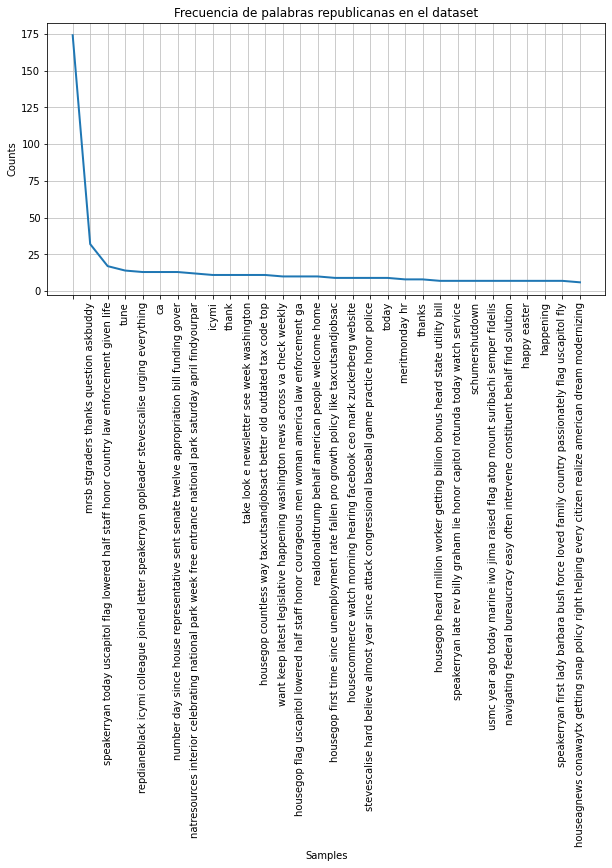

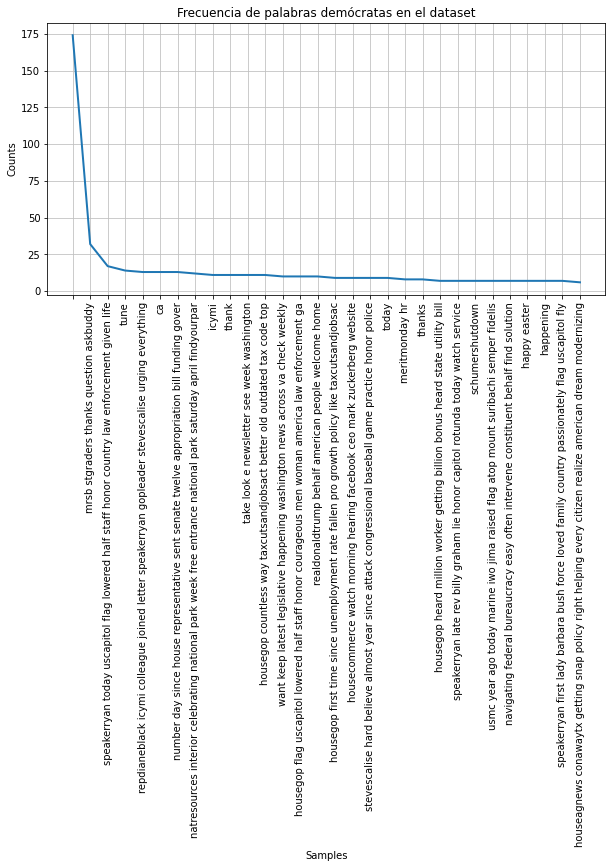

<AxesSubplot:title={'center':'Frecuencia de palabras demócratas en el dataset'}, xlabel='Samples', ylabel='Counts'>

In [6]:
rList = zikinkeriaKendu(repTweet)
dList = zikinkeriaKendu(demTweet)

#fdist = FreqDist(tweetsList)
fdist = FreqDist(rList)
plt.subplots(figsize=(10,5))
fdist.plot(30,title="Frecuencia de palabras republicanas en el dataset")

fdist = FreqDist(dList)
plt.subplots(figsize=(10,5))
fdist.plot(30,title="Frecuencia de palabras demócratas en el dataset")

In [22]:
X = tweets.Tweet #Tweetak
y = tweets.numClass #Klasea
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3, train_size=0.7, random_state = 42)

#TF-IDF
def tfidf(X_train, X_test, stopwords): #https://programmerah.com/tag/attributeerror-lower-not-found/
    tfidf_vec = TfidfVectorizer(stop_words = stopwords, binary = True)
    X_train_tfidf = tfidf_vec.fit_transform(X_train)
    X_test_tfidf = tfidf_vec.transform(X_test)
    return X_train_tfidf,X_test_tfidf    
    
X_train, X_test = tfidf(X_train, X_test,stopwords)

SyntaxError: invalid syntax (<ipython-input-22-f1da82dbb059>, line 15)

In [8]:
classifiers = ['DecisionTrees', 'RandomForest']

In [9]:
#Classifier function
def classifierFunction(clf, X, y):
    clf.fit(X,y)
    
#Predict function
def predictFunction(clf, X):
    return clf.predict(X)

In [10]:
predictScores = []
for u in range(10):
    DTC = DecisionTreeClassifier(random_state = u * 5)
    RFC = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = u * 4)
    clas = [DTC, RFC]
    for i in range(len(clas)):
        classifierFunction(clas[i], X_train, Y_train)
        Y_pred = predictFunction(clas[i], X_test)
        score = f1_score(Y_test, Y_pred)
        predictScores.append(score)
        print(u)
        print(clas[i])
        print(score)  

0
DecisionTreeClassifier(random_state=0)
0.6745761470577464
0
RandomForestClassifier(n_estimators=10, random_state=0)
0.7208163570440699
1
DecisionTreeClassifier(random_state=5)
0.6743770294428838
1
RandomForestClassifier(n_estimators=10, random_state=4)
0.7200661853188929
2
DecisionTreeClassifier(random_state=10)
0.6689422300521178
2
RandomForestClassifier(n_estimators=10, random_state=8)
0.7168838928931547
3
DecisionTreeClassifier(random_state=15)
0.6720739897970419
3
RandomForestClassifier(n_estimators=10, random_state=12)
0.7088892220056964
4
DecisionTreeClassifier(random_state=20)
0.6743515850144093
4
RandomForestClassifier(n_estimators=10, random_state=16)
0.712170187175825
5
DecisionTreeClassifier(random_state=25)
0.670640725570509
5
RandomForestClassifier(n_estimators=10, random_state=20)
0.7133230433309492
6
DecisionTreeClassifier(random_state=30)
0.6721515284481497
6
RandomForestClassifier(n_estimators=10, random_state=24)
0.7116087923688874


KeyboardInterrupt: 

In [ ]:
dtcScore = []
rfcScore = []
iteraciones = [x for x in range(10)]
for i in range(20):
    if i % 2 == 0: #Elementu bikoitiak DTCaren scoreak dira
        dtcScore.append(predictScores[i])
    else:
        rfcScore.append(predictScores[i])
        
plt.plot(iteraciones,dtcScore,color='red')
plt.plot(iteraciones,rfcScore,color='green')